In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import json
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from joblib import dump, load
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
from scipy.stats import pearsonr
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_csv('feetsZTFandAPOGEE.csv')
display(data)

oid filtercode       source_id_01_x      apogee_id_01_x  \
0       245113200002473         zg  2364561950954447872  2M00135100-2055372   
1       245113200002686         zg  2364556247237856256  2M00131008-2058054   
2       245113200002901         zg  2364555899344878976  2M00131027-2100087   
3       245113200002972         zg  2364555280869588480  2M00133364-2100524   
4       245114100000600         zg  2364732203458207360  2M00085954-2038355   
...                 ...        ...                  ...                 ...   
59172  1795116400002164         zg  1608320292912053120  2M14154780+5351450   
59173  1795116400003508         zg  1608294385669318912  2M14144682+5340576   
59174  1795116400004249         zg  1608264080380119808  2M14172437+5337015   
59175  1795116400013559         zg  1608239307008739968  2M14153620+5321458   
59176  1795116400013736         zg  1608236352071252864  2M14163392+5321013   

         FEETS_ra  FEETS_dec  FEETS_Amplitude  FEETS_AndersonDarling  \
0        3.462713 -20.926921         0.084504               0.885343   
1        3.292288 -20.968287         0.068747               1.000000   
2        3.292733 -21.002473         0.068613               1.000000   
3        3.390128 -21.014581         0.068843               1.000000   
4        2.248187 -20.643443         0.099483               1.000000   
...           ...        ...              ...                    ...   
59172  213.949116  53.862705         0.035544               1.000000   
59173  213.694862  53.682651         0.029783               1.000000   
59174  214.351687  53.617110         0.022659               1.000000   
59175  213.900858  53.362662         0.031648               0.999998   
59176  214.141297  53.350509         0.039312               1.000000   

       FEETS_Autocor_length  FEETS_Beyond1Std  ...  GAIAEDR3_PHOT_RP_MEAN_MAG  \
0                       2.0          0.285024  ...                    13.2033   
1                       1.0          0.101449  ...                    14.0735   
2                       1.0          0.144231  ...                    13.3797   
3                       1.0          0.163462  ...                    12.4275   
4                       1.0          0.111111  ...                    14.7157   
...                     ...               ...  ...                        ...   
59172                   1.0          0.091346  ...                    13.6469   
59173                   1.0          0.217391  ...                    13.2998   
59174                   1.0          0.211538  ...                    13.9793   
59175                   1.0          0.250000  ...                    11.0823   
59176                   1.0          0.163462  ...                    14.0791   

       GAIAEDR3_R_MED_GEO  GAIAEDR3_R_LO_GEO  GAIAEDR3_R_HI_GEO  \
0               339.67538          337.28570          342.69803   
1               295.23508          292.65470          297.42520   
2               340.71540          325.15480          368.62686   
3               170.18893          169.71016          170.66193   
4               295.60330          291.74728          299.22214   
...                   ...                ...                ...   
59172           169.56201          169.03460          170.10419   
59173           225.06349          224.21277          225.85630   
59174           493.21707          452.54745          536.97830   
59175          2437.09810         2364.41380         2519.58500   
59176           134.82205          134.47766          135.16624   

       GAIAEDR3_R_MED_PHOTOGEO  GAIAEDR3_R_LO_PHOTOGEO  \
0                    339.43900               337.17358   
1                    295.36190               292.47882   
2                    333.32245               316.79538   
3                    170.24036               169.78642   
4                    296.27444               291.86102   
...                        ...                     ...   
59172                1

In [3]:
counter = 0
for col in data.columns:
    print(f"[{counter}] {col}")
    counter = counter + 1

[0] oid
[1] filtercode
[2] source_id_01_x
[3] apogee_id_01_x
[4] FEETS_ra
[5] FEETS_dec
[6] FEETS_Amplitude
[7] FEETS_AndersonDarling
[8] FEETS_Autocor_length
[9] FEETS_Beyond1Std
[10] FEETS_CAR_mean
[11] FEETS_CAR_sigma
[12] FEETS_CAR_tau
[13] FEETS_Con
[14] FEETS_Eta_e
[15] FEETS_FluxPercentileRatioMid20
[16] FEETS_FluxPercentileRatioMid35
[17] FEETS_FluxPercentileRatioMid50
[18] FEETS_FluxPercentileRatioMid65
[19] FEETS_FluxPercentileRatioMid80
[20] FEETS_Freq1_harmonics_amplitude_0
[21] FEETS_Freq1_harmonics_amplitude_1
[22] FEETS_Freq1_harmonics_amplitude_2
[23] FEETS_Freq1_harmonics_amplitude_3
[24] FEETS_Freq1_harmonics_rel_phase_0
[25] FEETS_Freq1_harmonics_rel_phase_1
[26] FEETS_Freq1_harmonics_rel_phase_2
[27] FEETS_Freq1_harmonics_rel_phase_3
[28] FEETS_Freq2_harmonics_amplitude_0
[29] FEETS_Freq2_harmonics_amplitude_1
[30] FEETS_Freq2_harmonics_amplitude_2
[31] FEETS_Freq2_harmonics_amplitude_3
[32] FEETS_Freq2_harmonics_rel_phase_0
[33] FEETS_Freq2_harmonics_rel_phase_1
[3

In [4]:
# Meta columns to exclude

hr2 = 0
n = 0



print (f"top of {n}")
meta_columns = ['oid', 'filtercode', 'source_id_01', 'apogee_id_01']

# Columns to use for training (excluding GAIA and most APOGEE data)
training_columns = [col for col in data.columns if (col.startswith('FEETS_') or col in(['APOGEE_TEFF', 'APOGEE_FE_H','APOGEE_RV_TEFF', 'APOGEE_RV_FEH','APOGEE_TEFF_SPEC','APOGEE_FE'])) and (col not in ['FEETS_ra', 'FEETS_dec','ZTF_dist_x','ra','RA','dec','DEC','id','ID'] and col not in meta_columns)]

top of 0


In [5]:
display(training_columns)
display(data[training_columns])

['FEETS_Amplitude',
 'FEETS_AndersonDarling',
 'FEETS_Autocor_length',
 'FEETS_Beyond1Std',
 'FEETS_CAR_mean',
 'FEETS_CAR_sigma',
 'FEETS_CAR_tau',
 'FEETS_Con',
 'FEETS_Eta_e',
 'FEETS_FluxPercentileRatioMid20',
 'FEETS_FluxPercentileRatioMid35',
 'FEETS_FluxPercentileRatioMid50',
 'FEETS_FluxPercentileRatioMid65',
 'FEETS_FluxPercentileRatioMid80',
 'FEETS_Freq1_harmonics_amplitude_0',
 'FEETS_Freq1_harmonics_amplitude_1',
 'FEETS_Freq1_harmonics_amplitude_2',
 'FEETS_Freq1_harmonics_amplitude_3',
 'FEETS_Freq1_harmonics_rel_phase_0',
 'FEETS_Freq1_harmonics_rel_phase_1',
 'FEETS_Freq1_harmonics_rel_phase_2',
 'FEETS_Freq1_harmonics_rel_phase_3',
 'FEETS_Freq2_harmonics_amplitude_0',
 'FEETS_Freq2_harmonics_amplitude_1',
 'FEETS_Freq2_harmonics_amplitude_2',
 'FEETS_Freq2_harmonics_amplitude_3',
 'FEETS_Freq2_harmonics_rel_phase_0',
 'FEETS_Freq2_harmonics_rel_phase_1',
 'FEETS_Freq2_harmonics_rel_phase_2',
 'FEETS_Freq2_harmonics_rel_phase_3',
 'FEETS_Freq3_harmonics_amplitude_0',


FEETS_Amplitude  FEETS_AndersonDarling  FEETS_Autocor_length  \
0             0.084504               0.885343                   2.0   
1             0.068747               1.000000                   1.0   
2             0.068613               1.000000                   1.0   
3             0.068843               1.000000                   1.0   
4             0.099483               1.000000                   1.0   
...                ...                    ...                   ...   
59172         0.035544               1.000000                   1.0   
59173         0.029783               1.000000                   1.0   
59174         0.022659               1.000000                   1.0   
59175         0.031648               0.999998                   1.0   
59176         0.039312               1.000000                   1.0   

       FEETS_Beyond1Std  FEETS_CAR_mean  FEETS_CAR_sigma  FEETS_CAR_tau  \
0              0.285024       21.051425         0.000000       0.704687   
1              0.101449       25.487167         0.000000       0.635156   
2              0.144231       23.989169         0.000000       0.631055   
3              0.163462       22.532562         0.000000       0.636426   
4              0.111111        8.877708         0.064796       1.918569   
...                 ...             ...              ...            ...   
59172          0.091346        0.848332         0.022626      18.958132   
59173          0.217391       26.815359         0.000000       0.575781   
59174          0.211538       21.997974         0.000000       0.704687   
59175          0.250000       19.680455         0.000000       0.648437   
59176          0.163462        2.841979         0.039590       5.880250   

       FEETS_Con   FEETS_Eta_e  FEETS_FluxPercentileRatioMid20  ...  \
0       0.000000  9.011373e+05                        0.170056  ...   
1       0.000000  9.084593e+05                        0.124755  ...   
2       0.000000  2.063617e+06                        0.102556  ...   
3       0.000000  1.550269e+06                        0.119294  ...   
4       0.000000  1.501376e+06                        0.118403  ...   
...          ...           ...                             ...  ...   
59172   0.000000  1.177141e+08                        0.140607  ...   
59173   0.009756  1.879283e+08                        0.134476  ...   
59174   0.000000  1.490325e+08                        0.136804  ...   
59175   0.000000  2.120814e+08                        0.139374  ...   
59176   0.004854  1.536705e+08                        0.171289  ...   

       FEETS_StetsonK  FEETS_StetsonK_AC  FEETS_StructureFunction_index_21  \
0            0.768038           0.766427                          1.504427   
1            0.549056           0.578672                          1.724148   
2            0.614862           0.641417                          1.860023   
3            0.650798           0.651082                          1.648119   
4            0.580866           0.685695                          1.800886   
...               ...                ...                               ...   
59172        0.529916           0.464383                          2.330054   
59173        0.674022           0.465678                          1.811650   
59174        0.652056           0.477518                          1.707862   
59175        0.728502           0.455596                          1.247175   
59176        0.666641           0.469121                          1.631942   

       FEETS_StructureFunction_index_31  FEETS_StructureFunction_index_32  \
0                              1.539554                          1.089450   
1                              1.919312                          1.239982   
2                              2.508402                          1.442210   
3                              1.904480                          1.280051   
4                              2.513992                          1.427883   
.

In [6]:
counter = 0

feetsFocusedCols= training_columns
LOGG = ["APOGEE_LOGG"]
display(LOGG)
feetsFocusedCols += LOGG

display(feetsFocusedCols)
feetsFocusedData = data[feetsFocusedCols]
for col in feetsFocusedData.columns:
    print(f"[{counter}] {col}")
    counter = counter + 1

['APOGEE_LOGG']

['FEETS_Amplitude',
 'FEETS_AndersonDarling',
 'FEETS_Autocor_length',
 'FEETS_Beyond1Std',
 'FEETS_CAR_mean',
 'FEETS_CAR_sigma',
 'FEETS_CAR_tau',
 'FEETS_Con',
 'FEETS_Eta_e',
 'FEETS_FluxPercentileRatioMid20',
 'FEETS_FluxPercentileRatioMid35',
 'FEETS_FluxPercentileRatioMid50',
 'FEETS_FluxPercentileRatioMid65',
 'FEETS_FluxPercentileRatioMid80',
 'FEETS_Freq1_harmonics_amplitude_0',
 'FEETS_Freq1_harmonics_amplitude_1',
 'FEETS_Freq1_harmonics_amplitude_2',
 'FEETS_Freq1_harmonics_amplitude_3',
 'FEETS_Freq1_harmonics_rel_phase_0',
 'FEETS_Freq1_harmonics_rel_phase_1',
 'FEETS_Freq1_harmonics_rel_phase_2',
 'FEETS_Freq1_harmonics_rel_phase_3',
 'FEETS_Freq2_harmonics_amplitude_0',
 'FEETS_Freq2_harmonics_amplitude_1',
 'FEETS_Freq2_harmonics_amplitude_2',
 'FEETS_Freq2_harmonics_amplitude_3',
 'FEETS_Freq2_harmonics_rel_phase_0',
 'FEETS_Freq2_harmonics_rel_phase_1',
 'FEETS_Freq2_harmonics_rel_phase_2',
 'FEETS_Freq2_harmonics_rel_phase_3',
 'FEETS_Freq3_harmonics_amplitude_0',


[0] FEETS_Amplitude
[1] FEETS_AndersonDarling
[2] FEETS_Autocor_length
[3] FEETS_Beyond1Std
[4] FEETS_CAR_mean
[5] FEETS_CAR_sigma
[6] FEETS_CAR_tau
[7] FEETS_Con
[8] FEETS_Eta_e
[9] FEETS_FluxPercentileRatioMid20
[10] FEETS_FluxPercentileRatioMid35
[11] FEETS_FluxPercentileRatioMid50
[12] FEETS_FluxPercentileRatioMid65
[13] FEETS_FluxPercentileRatioMid80
[14] FEETS_Freq1_harmonics_amplitude_0
[15] FEETS_Freq1_harmonics_amplitude_1
[16] FEETS_Freq1_harmonics_amplitude_2
[17] FEETS_Freq1_harmonics_amplitude_3
[18] FEETS_Freq1_harmonics_rel_phase_0
[19] FEETS_Freq1_harmonics_rel_phase_1
[20] FEETS_Freq1_harmonics_rel_phase_2
[21] FEETS_Freq1_harmonics_rel_phase_3
[22] FEETS_Freq2_harmonics_amplitude_0
[23] FEETS_Freq2_harmonics_amplitude_1
[24] FEETS_Freq2_harmonics_amplitude_2
[25] FEETS_Freq2_harmonics_amplitude_3
[26] FEETS_Freq2_harmonics_rel_phase_0
[27] FEETS_Freq2_harmonics_rel_phase_1
[28] FEETS_Freq2_harmonics_rel_phase_2
[29] FEETS_Freq2_harmonics_rel_phase_3
[30] FEETS_Freq3_h

In [7]:
# remove FEETS_Freq*_harmonics_rel_phase_0

feetsFocusedDataClean = feetsFocusedData.drop(['FEETS_Freq1_harmonics_rel_phase_0','FEETS_Freq2_harmonics_rel_phase_0','FEETS_Freq3_harmonics_rel_phase_0'], axis=1)
for col in feetsFocusedDataClean.columns:
    print(f"[{counter}] {col}")
    counter = counter + 1

[69] FEETS_Amplitude
[70] FEETS_AndersonDarling
[71] FEETS_Autocor_length
[72] FEETS_Beyond1Std
[73] FEETS_CAR_mean
[74] FEETS_CAR_sigma
[75] FEETS_CAR_tau
[76] FEETS_Con
[77] FEETS_Eta_e
[78] FEETS_FluxPercentileRatioMid20
[79] FEETS_FluxPercentileRatioMid35
[80] FEETS_FluxPercentileRatioMid50
[81] FEETS_FluxPercentileRatioMid65
[82] FEETS_FluxPercentileRatioMid80
[83] FEETS_Freq1_harmonics_amplitude_0
[84] FEETS_Freq1_harmonics_amplitude_1
[85] FEETS_Freq1_harmonics_amplitude_2
[86] FEETS_Freq1_harmonics_amplitude_3
[87] FEETS_Freq1_harmonics_rel_phase_1
[88] FEETS_Freq1_harmonics_rel_phase_2
[89] FEETS_Freq1_harmonics_rel_phase_3
[90] FEETS_Freq2_harmonics_amplitude_0
[91] FEETS_Freq2_harmonics_amplitude_1
[92] FEETS_Freq2_harmonics_amplitude_2
[93] FEETS_Freq2_harmonics_amplitude_3
[94] FEETS_Freq2_harmonics_rel_phase_1
[95] FEETS_Freq2_harmonics_rel_phase_2
[96] FEETS_Freq2_harmonics_rel_phase_3
[97] FEETS_Freq3_harmonics_amplitude_0
[98] FEETS_Freq3_harmonics_amplitude_1
[99] FEE

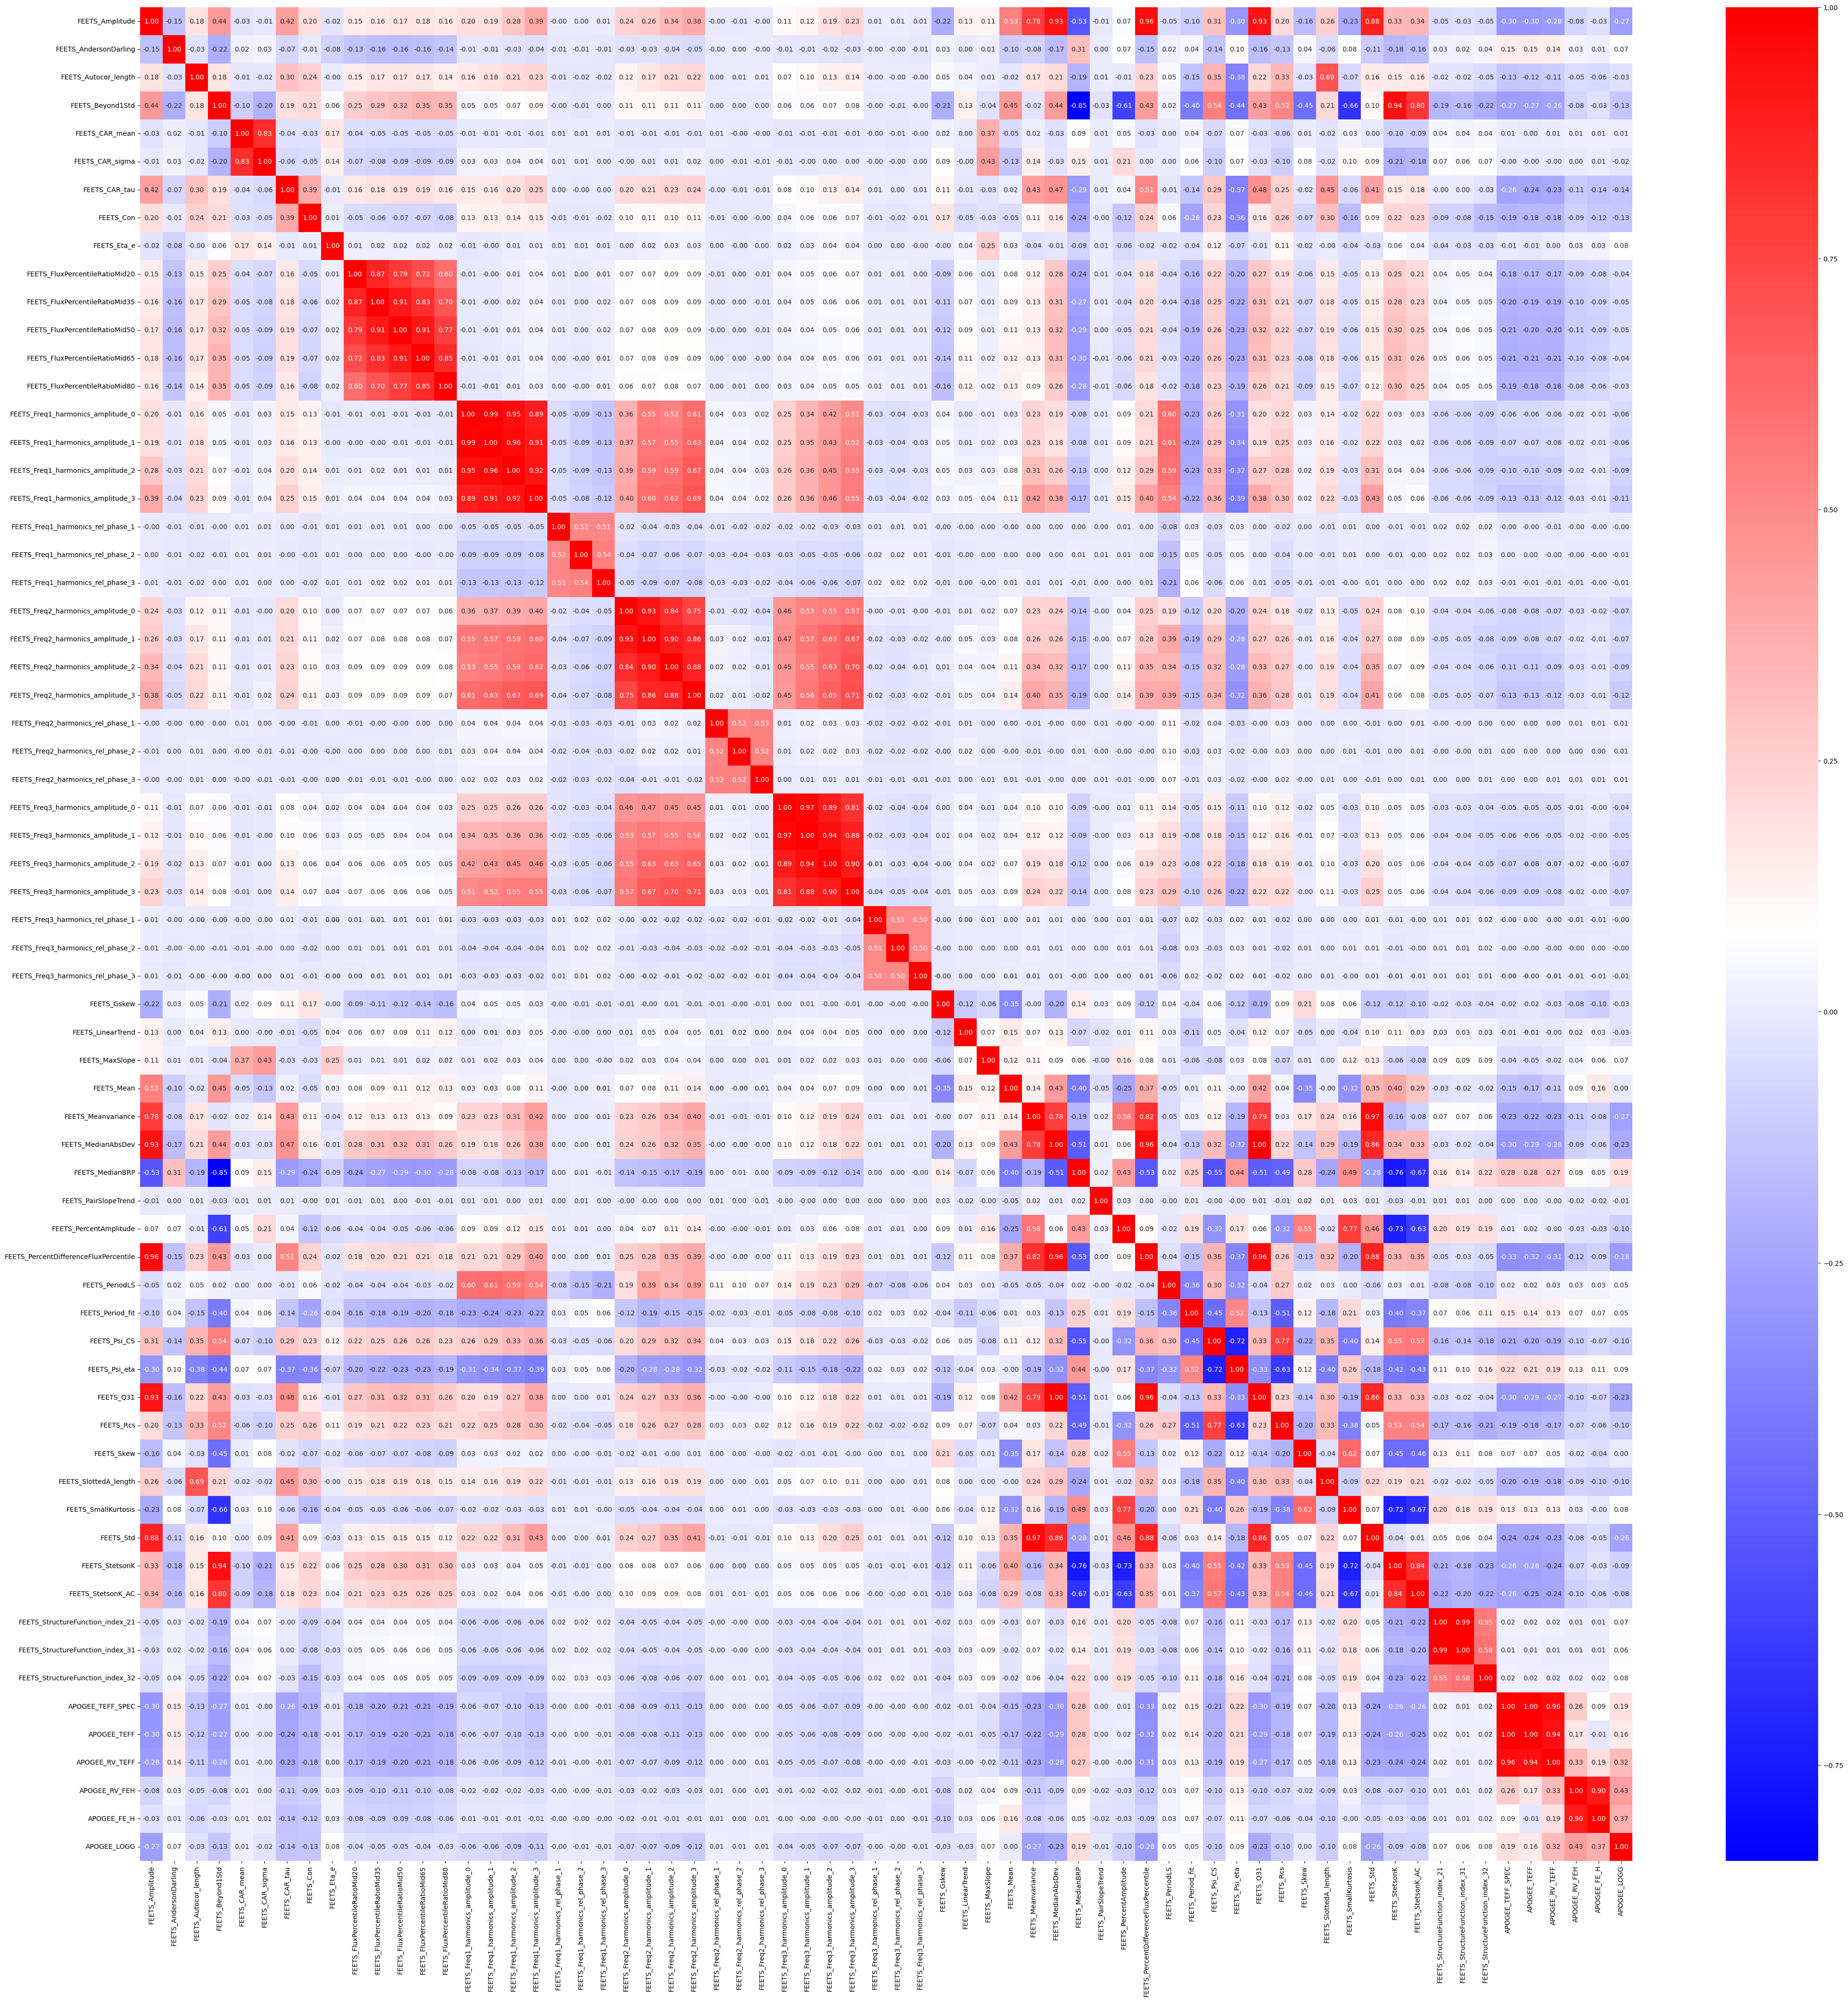

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# # Summary statistics
# print(data.describe())

# Correlation matrix
plt.figure(figsize=(50, 50))
sns.heatmap(feetsFocusedDataClean.corr(), annot=True, fmt=".2f",cmap = 'bwr')
plt.show()

In [9]:
# Initialize lists to store correlation coefficients and p-values
correlations = []
p_values = []

# Calculate correlation and p-value for each feature
for col in feetsFocusedDataClean.columns:
    corr, p_val = pearsonr(data[col], data['APOGEE_LOGG'])
    correlations.append(corr)
    p_values.append(p_val)

# Create a DataFrame to hold the results
correlation_df = pd.DataFrame({
    'Feature': feetsFocusedDataClean.columns,
    'Correlation': correlations,
    'P-Value': p_values})

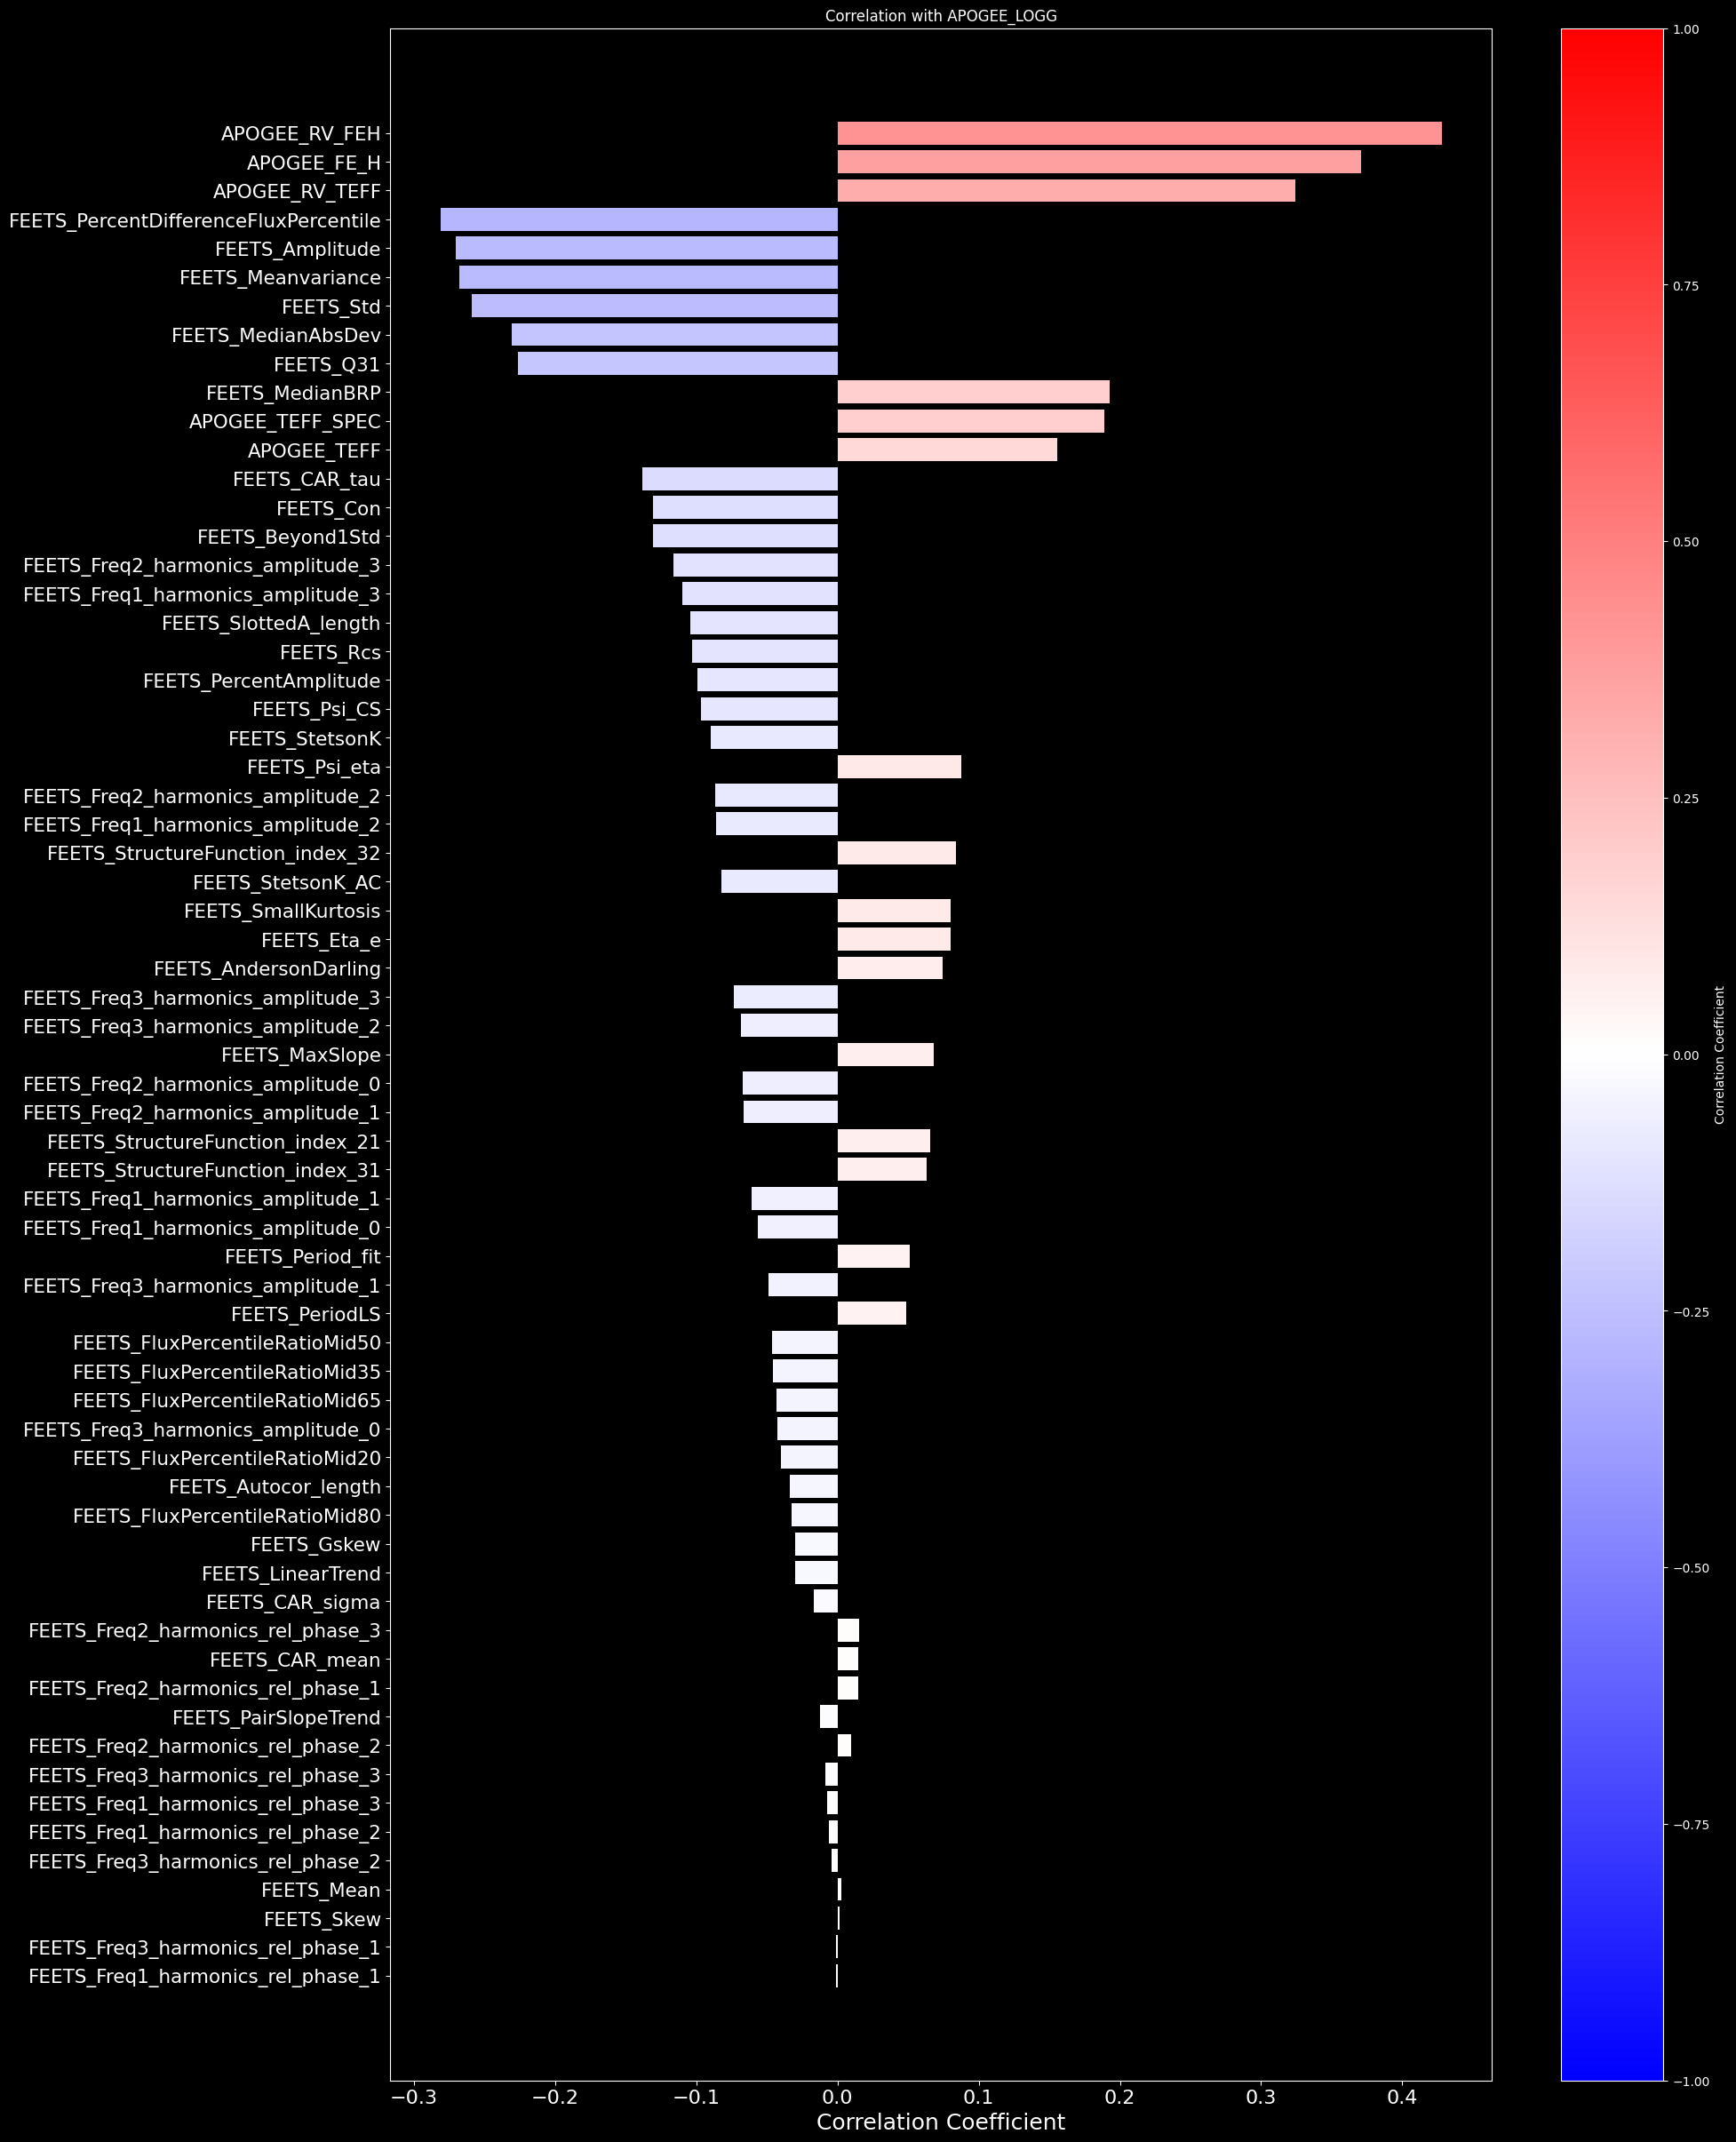

In [10]:
plt.style.use('dark_background')
# Exclude the row with 'APOGEE_LOGG'
correlation_df = correlation_df[correlation_df['Feature'] != 'APOGEE_LOGG']
correlation_df = correlation_df.sort_values(by='Correlation', key=abs, ascending=False)
# Define the colormap normalization from -1 to 1
norm = plt.Normalize(vmin=-1, vmax=1)
colors = plt.cm.bwr(norm(correlation_df['Correlation']))

# Plot correlation coefficients
plt.figure(figsize=(20, 30))
bars = plt.barh(correlation_df['Feature'], correlation_df['Correlation'], color=colors)
plt.xlabel('Correlation Coefficient', fontsize=18)  # Adjust label text size here
plt.title('Correlation with APOGEE_LOGG', fontsize=12)  # Adjust title text size here
plt.xticks(fontsize=16)  # Adjust x-axis tick size here
plt.yticks(fontsize=15.5)  # Adjust y-axis tick size here
plt.gca().invert_yaxis()


# Add colorbar
sm = plt.cm.ScalarMappable(cmap='bwr', norm=norm)
sm.set_array([])  # Only needed for adding colorbar without mappable
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Correlation Coefficient')

plt.show()

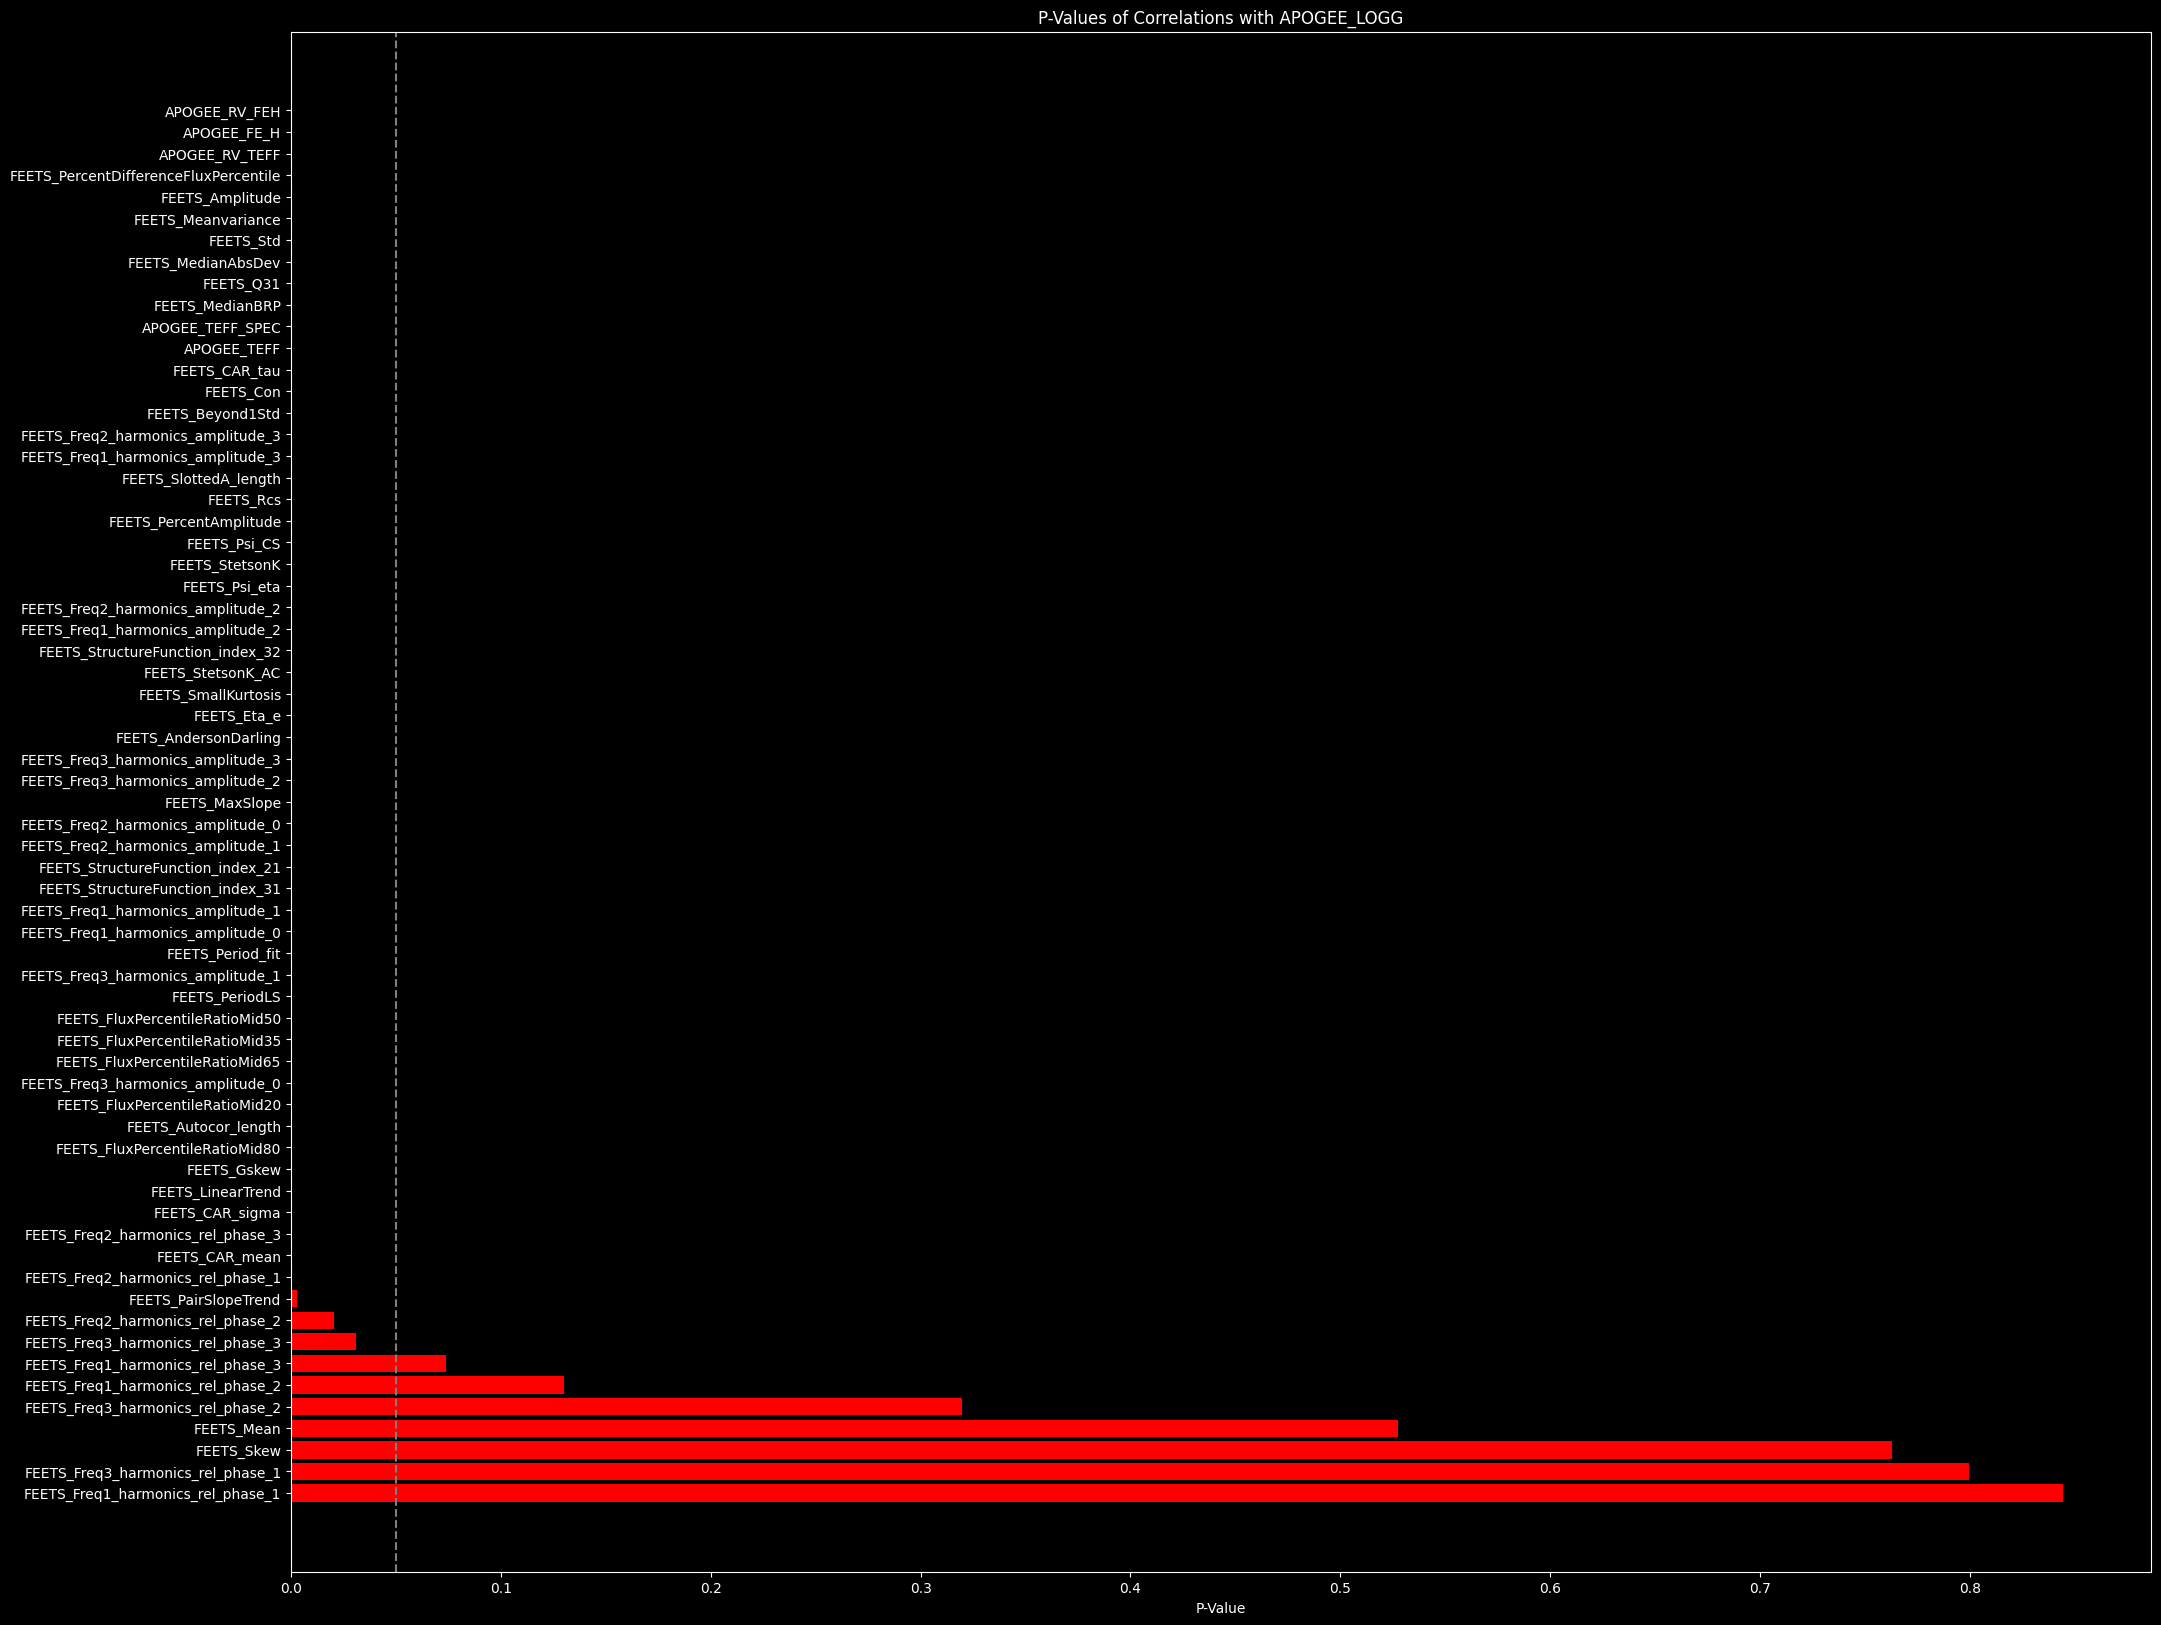

In [11]:
# Plot p-values
plt.figure(figsize=(24, 20))
plt.barh(correlation_df['Feature'], correlation_df['P-Value'], color='r')
plt.axvline(x=0.05, color='gray', linestyle='--')
plt.xlabel('P-Value')
plt.title('P-Values of Correlations with APOGEE_LOGG')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization
scaler_standard = StandardScaler()
data_standardized = scaler_standard.fit_transform(feetsFocusedData)

# Normalization
scaler_minmax = MinMaxScaler()
data_normalized = scaler_minmax.fit_transform(feetsFocusedData)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

prenormedData = data
data = data_normalized

# Correlation matrix
plt.figure(figsize=(50, 50))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

data = prenormedData

In [ ]:
feetsFocusedDataClean# Pair plot (selecting a subset of features for visualization)
sns.pairplot(data[['APOGEE_LOGG', 'APOGEE_TEFF', 'FEETS_Amplitude', 'ZTF_meanmag']])
plt.show()

In [15]:
# Prepare feature and target data
X = feetsFocusedDataClean.drop(columns=['APOGEE_LOGG'])
y = data['APOGEE_LOGG']  # You can change this to 'APOGEE_LOGG_SPEC' or 'APOGEE_RV_LOGG' if needed
display(X)

FEETS_Amplitude  FEETS_AndersonDarling  FEETS_Autocor_length  \
0             0.084504               0.885343                   2.0   
1             0.068747               1.000000                   1.0   
2             0.068613               1.000000                   1.0   
3             0.068843               1.000000                   1.0   
4             0.099483               1.000000                   1.0   
...                ...                    ...                   ...   
59172         0.035544               1.000000                   1.0   
59173         0.029783               1.000000                   1.0   
59174         0.022659               1.000000                   1.0   
59175         0.031648               0.999998                   1.0   
59176         0.039312               1.000000                   1.0   

       FEETS_Beyond1Std  FEETS_CAR_mean  FEETS_CAR_sigma  FEETS_CAR_tau  \
0              0.285024       21.051425         0.000000       0.704687   
1              0.101449       25.487167         0.000000       0.635156   
2              0.144231       23.989169         0.000000       0.631055   
3              0.163462       22.532562         0.000000       0.636426   
4              0.111111        8.877708         0.064796       1.918569   
...                 ...             ...              ...            ...   
59172          0.091346        0.848332         0.022626      18.958132   
59173          0.217391       26.815359         0.000000       0.575781   
59174          0.211538       21.997974         0.000000       0.704687   
59175          0.250000       19.680455         0.000000       0.648437   
59176          0.163462        2.841979         0.039590       5.880250   

       FEETS_Con   FEETS_Eta_e  FEETS_FluxPercentileRatioMid20  ...  \
0       0.000000  9.011373e+05                        0.170056  ...   
1       0.000000  9.084593e+05                        0.124755  ...   
2       0.000000  2.063617e+06                        0.102556  ...   
3       0.000000  1.550269e+06                        0.119294  ...   
4       0.000000  1.501376e+06                        0.118403  ...   
...          ...           ...                             ...  ...   
59172   0.000000  1.177141e+08                        0.140607  ...   
59173   0.009756  1.879283e+08                        0.134476  ...   
59174   0.000000  1.490325e+08                        0.136804  ...   
59175   0.000000  2.120814e+08                        0.139374  ...   
59176   0.004854  1.536705e+08                        0.171289  ...   

       FEETS_StetsonK  FEETS_StetsonK_AC  FEETS_StructureFunction_index_21  \
0            0.768038           0.766427                          1.504427   
1            0.549056           0.578672                          1.724148   
2            0.614862           0.641417                          1.860023   
3            0.650798           0.651082                          1.648119   
4            0.580866           0.685695                          1.800886   
...               ...                ...                               ...   
59172        0.529916           0.464383                          2.330054   
59173        0.674022           0.465678                          1.811650   
59174        0.652056           0.477518                          1.707862   
59175        0.728502           0.455596                          1.247175   
59176        0.666641           0.469121                          1.631942   

       FEETS_StructureFunction_index_31  FEETS_StructureFunction_index_32  \
0                              1.539554                          1.089450   
1                              1.919312                          1.239982   
2                              2.508402                          1.442210   
3                              1.904480                          1.280051   
4                              2.513992                          1.427883   
.

In [ ]:
import random
# Example DataFrame
#df = pd.DataFrame(columns=['n', 'n_estimators', 'rand', 'mse', 'r_squared'])
n = 16
#
while n < 26: #51:
    print (f"preping {n}")
    # Create the preprocessing pipeline
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),  # Step 1: Impute missing values with mean
        ('scaling', StandardScaler()),  # Step 2: Standardize the features
        ('feature_selection', SelectKBest(score_func=f_regression, k=65)),  # Step 3: Select top 100 features
    ])

    # Fit and transform the data
    X_preprocessed = pipeline.fit_transform(X, y)
    randTrain = random.randint(0, 10000)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=8248)
    print (f"training {n}")
    # Initialize and train the model
    randRFR = random.randint(0, 10000)
    rfr = RandomForestRegressor(n_estimators=n*100, random_state=4180)
    rfr.fit(X_train, y_train)

    # Make predictions
    y_pred = rfr.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    if r2 > hr2:
        print(f"attempt {n} exceeds {n-1}")
        print(f"New best run {n} with R^2: {r2} beats run {bestRun}with R^2 {hr2}")
        hr2 = r2
        bestRun = n
    else:
        print(f"attempt {n} failed to exceed {n-1}")
        print(f"Best run is still {bestRun} with R^2: {hr2}")
        # Display metrics
    print(f'Mean Squared Error: {mse}')
    print(f'R² Score: {r2}')
    
    # Create a subdirectory to save models and metrics
    output_dir = f'RFRexp5-3-Monster/RUN{n}'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Save the trained model
    model_path = os.path.join(output_dir, 'random_forest_regressor.joblib')
    dump(rfr, model_path)
    # Append a new row to the DataFrame
    new_row = pd.DataFrame({
        'Run': [n],
        'N_Estimators': [n*100],
        'Random Training State': [randTrain],
        'Random RFR State' : [randRFR],
        'MSE': [mse],
        'R^2': [r2]
    })
    display(new_row)

    df = pd.concat([df, new_row], ignore_index=True)
    
    n = n+1



        
        

preping 16
training 16
attempt 16 failed to exceed 15
Best run is still 7 with R^2: 0.9249712343843322
Mean Squared Error: 0.1499972289314552
R² Score: 0.9200561119702144


Run  N_Estimators  Random Training State  Random RFR State       MSE  \
0   16          1600                   6510              7530  0.149997   

        R^2  
0  0.920056

preping 17
training 17
attempt 17 failed to exceed 16
Best run is still 7 with R^2: 0.9249712343843322
Mean Squared Error: 0.15012830527932322
R² Score: 0.9199862523271266


Run  N_Estimators  Random Training State  Random RFR State       MSE  \
0   17          1700                   5551              2906  0.150128   

        R^2  
0  0.919986

preping 18
training 18
attempt 18 failed to exceed 17
Best run is still 7 with R^2: 0.9249712343843322
Mean Squared Error: 0.1500225636296009
R² Score: 0.9200426093589578


Run  N_Estimators  Random Training State  Random RFR State       MSE  \
0   18          1800                    263              7292  0.150023   

        R^2  
0  0.920043

preping 19
training 19
attempt 19 failed to exceed 18
Best run is still 7 with R^2: 0.9249712343843322
Mean Squared Error: 0.1499849115548089
R² Score: 0.9200626767513537


Run  N_Estimators  Random Training State  Random RFR State       MSE  \
0   19          1900                   7482              3896  0.149985   

        R^2  
0  0.920063

preping 20
training 20
attempt 20 failed to exceed 19
Best run is still 7 with R^2: 0.9249712343843322
Mean Squared Error: 0.14990777534268077
R² Score: 0.9201037879688698


Run  N_Estimators  Random Training State  Random RFR State       MSE  \
0   20          2000                   4257              6257  0.149908   

        R^2  
0  0.920104

preping 21
training 21
attempt 21 failed to exceed 20
Best run is still 7 with R^2: 0.9249712343843322
Mean Squared Error: 0.149970275954538
R² Score: 0.9200704770740507


Run  N_Estimators  Random Training State  Random RFR State      MSE  \
0   21          2100                   7601              1986  0.14997   

       R^2  
0  0.92007

preping 22
training 22


Run  N_Estimators  Random Training State  Random RFR State       MSE  \
0    1.0         100.0                 8159.0            4249.0  0.154429   
1    2.0         200.0                 2900.0            1818.0  0.161540   
2    3.0         300.0                 4908.0            3443.0  0.145402   
3    4.0         400.0                 5503.0            8954.0  0.167889   
4    5.0         500.0                 9309.0             994.0  0.152870   
5    6.0         600.0                 2058.0             717.0  0.145200   
6    7.0         700.0                 2902.0            3012.0  0.139994   
7    8.0         800.0                 9756.0            8604.0  0.153530   
8    9.0         900.0                 6585.0            2692.0  0.156952   
9   10.0        1000.0                 2205.0            9773.0  0.152118   
10  11.0        1100.0                 4195.0            2416.0  0.149880   
11   1.0         100.0                 9987.0            1495.0  0.153734   
12   2.0         200.0                 1745.0            3587.0  0.150886   
13   3.0         300.0                 1118.0            3573.0  0.150543   
14   4.0         400.0                 2458.0             178.0  0.150253   
15   5.0         500.0                 8473.0            5261.0  0.149880   
16   6.0         600.0                 8278.0            8773.0  0.150026   
17   7.0         700.0                 8137.0            1127.0  0.150067   
18   8.0         800.0                 3602.0            1289.0  0.150033   
19   9.0         900.0                 3299.0            5908.0  0.149783   
20  10.0        1000.0                 3393.0            8997.0  0.149809   
21  11.0        1100.0                 8755.0             258.0  0.149844   
22  12.0        1200.0                 8422.0            5771.0  0.149886   
23  13.0        1300.0                 2371.0            6774.0  0.149909   
24  14.0        1400.0                 1347.0            2023.0  0.149966   
25  15.0        1500.0                  184.0            2377.0  0.150033   
26  26.0        2600.0                 8213.0            4391.0  0.149865   
27  27.0        2700.0                 8075.0            1227.0  0.149850   
28  28.0        2800.0                 3859.0            6345.0  0.149850   
29  29.0        2900.0                 5198.0            4629.0  0.149836   
30  30.0        3000.0                 1999.0            5813.0  0.149771   
31  31.0        3100.0                 5981.0            9460.0  0.149764   
32  32.0        3200.0                 7086.0            1872.0  0.149757   

         R^2  
0   0.918286  
1   0.914007  
2   0.922569  
3   0.911474  
4   0.917871  
5   0.922232  
6   0.924971  
7   0.918026  
8   0.915104  
9   0.919181  
10  0.920744  
11  0.918064  
12  0.919583  
13  0.919765  
14  0.919920  
15  0.920119  
16  0.920041  
17  0.920019  
18  0.920037  
19  0.920170  
20  0.920156  
21  0.920138  
22  0.920115  
23  0.920103  
24  0.920073  
25  0.920037  
26  0.920127  
27  0.920135  
28  0.920135  
29  0.920142  
30  0.920177  
31  0.920180  
32  0.920184

<function matplotlib.pyplot.show(close=None, block=None)>

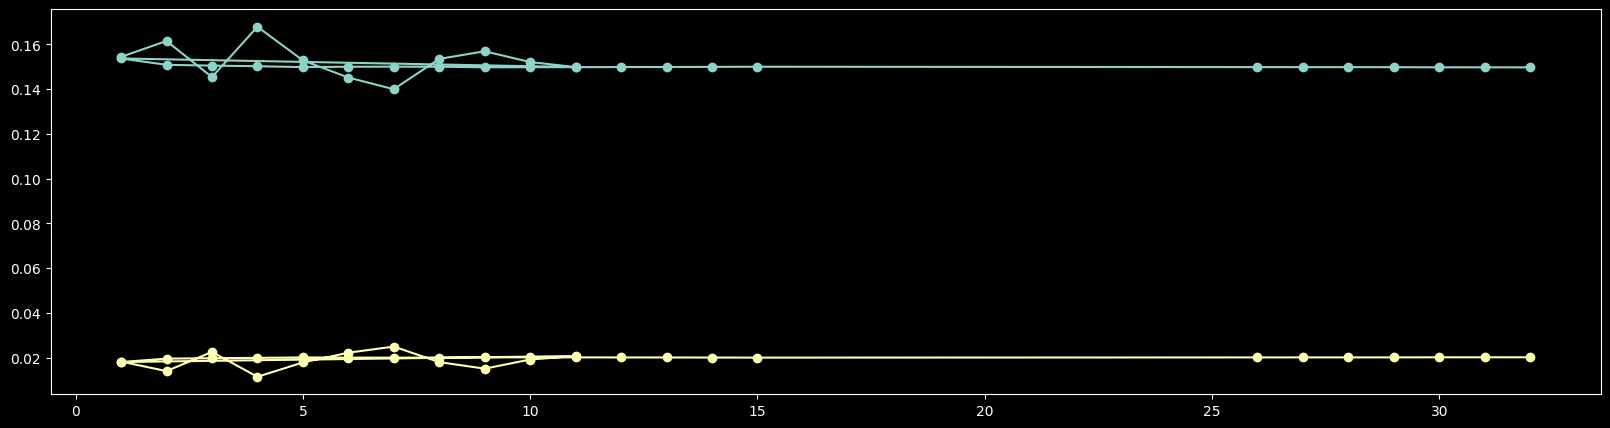

In [37]:
df = df.sort_values()
display(df.drop(columns=['n','n_estimators',	'rand',	'mse',	'r_squared']))
plt.figure(figsize=(20, 5))
plt.plot(df['Run'], df['MSE'])
plt.plot(df['Run'], df['R^2']-0.9)
plt.scatter(df['Run'], df['MSE'])
plt.scatter(df['Run'], df['R^2']-0.9)
plt.show

In [65]:
# Create a subdirectory to save models and metrics
output_dir = 'RFRexp5-3'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the trained model
model_path = os.path.join(output_dir, 'random_forest_regressor.joblib')
dump(rfr, model_path)

['RFRexp5-2/random_forest_regressor.joblib']

In [66]:


# Save metrics as CSV
metrics_df = pd.DataFrame({
    'Mean Squared Error': [mse],
    'R² Score':[r2]
   
})
metrics_path = os.path.join(output_dir, 'metrics.csv')
metrics_df.to_csv(metrics_path, index=False)

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rfr, X_preprocessed, y, cv=5, scoring='r2')
print(f'Cross-validated R² scores: {cv_scores}')
print(f'Mean Cross-validated R² score: {np.mean(cv_scores)}')



# Save cross-validation metrics to CSV
cv_metrics_path = os.path.join(output_dir, 'cv_metrics.csv')
cv_metrics_df.to_csv(cv_metrics_path, index=False)



In [ ]:
# Save cross-validation metrics to CSV
cv_metrics_df = pd.DataFrame({
    'Fold': np.arange(1, 6),
    'R² Score': cv_scores
})
cv_metrics_path = os.path.join(output_dir, 'cv_metrics.csv')
cv_metrics_df.to_csv(cv_metrics_path, index=False)


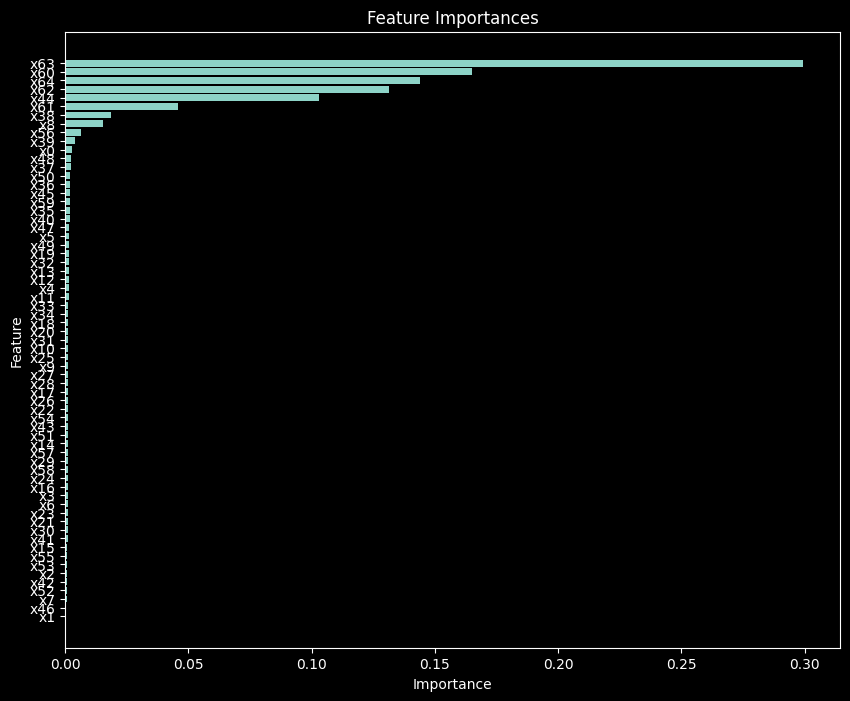

In [67]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = rfr.feature_importances_

# Get the names of the selected features
selected_features = pipeline.named_steps['feature_selection'].get_feature_names_out()

# Create a DataFrame for visualization
importances_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
})

# Sort by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# Save feature importances to CSV
importances_path = os.path.join(output_dir, 'feature_importances.csv')
importances_df.to_csv(importances_path, index=False)

# Save the plot
plot_path = os.path.join(output_dir, 'feature_importances.png')
plt.savefig(plot_path)

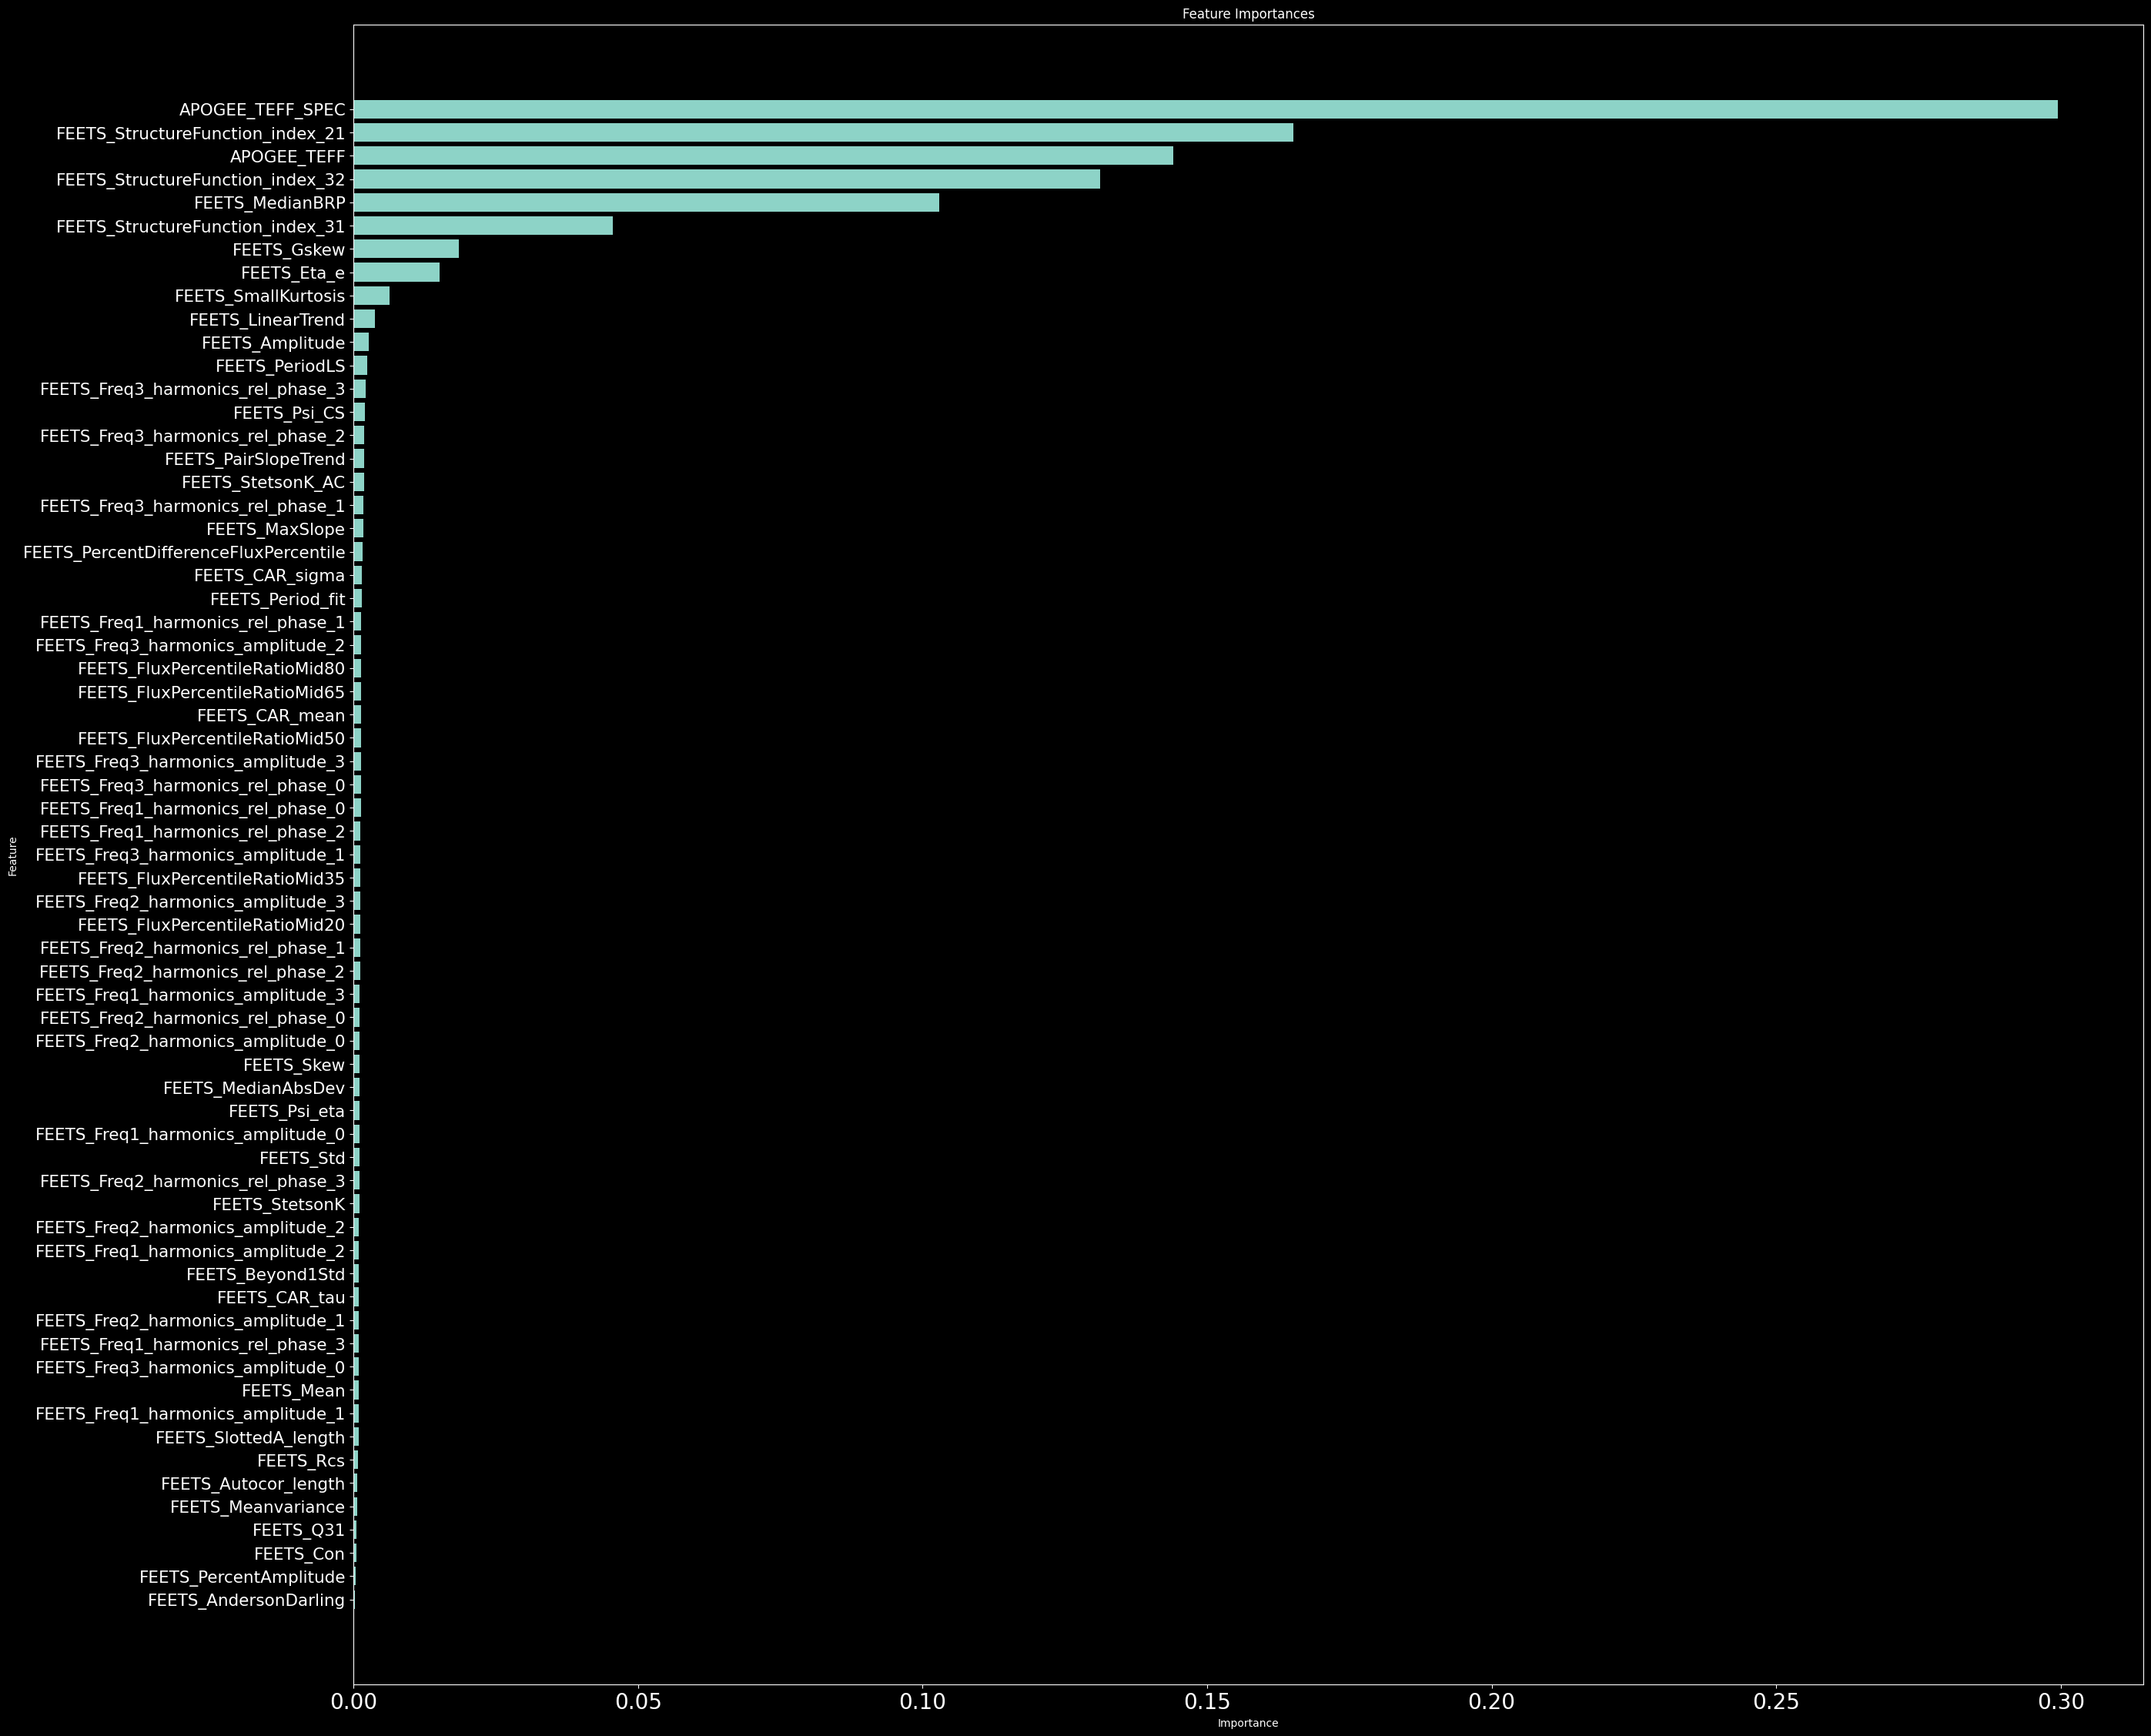

In [71]:
import os
import pandas as pd
import numpy as np
from joblib import dump
import matplotlib.pyplot as plt

# Assuming the output directory, pipeline, and model are already defined and fitted

# Extract the indices of the selected features
selected_feature_indices = pipeline.named_steps['feature_selection'].get_support(indices=True)

# Map the selected feature indices to the original column names
selected_feature_names = [training_columns[i] for i in selected_feature_indices]

# Get feature importances from the fitted model
feature_importances = rfr.feature_importances_

# Create a DataFrame using the original column names and their importances
importances_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Save feature importances to CSV
importances_path = os.path.join(output_dir, 'feature_importances.csv')
importances_df.to_csv(importances_path, index=False)

# Plot feature importances
plt.figure(figsize=(30, 28))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.yticks(fontsize=15.5)
plt.xticks(fontsize=20)
plt.title('Feature Importances')
plt.gca().invert_yaxis()

# Save the plot
plot_path = os.path.join(output_dir, 'feature_importances.png')
plt.savefig(plot_path)
plt.show()


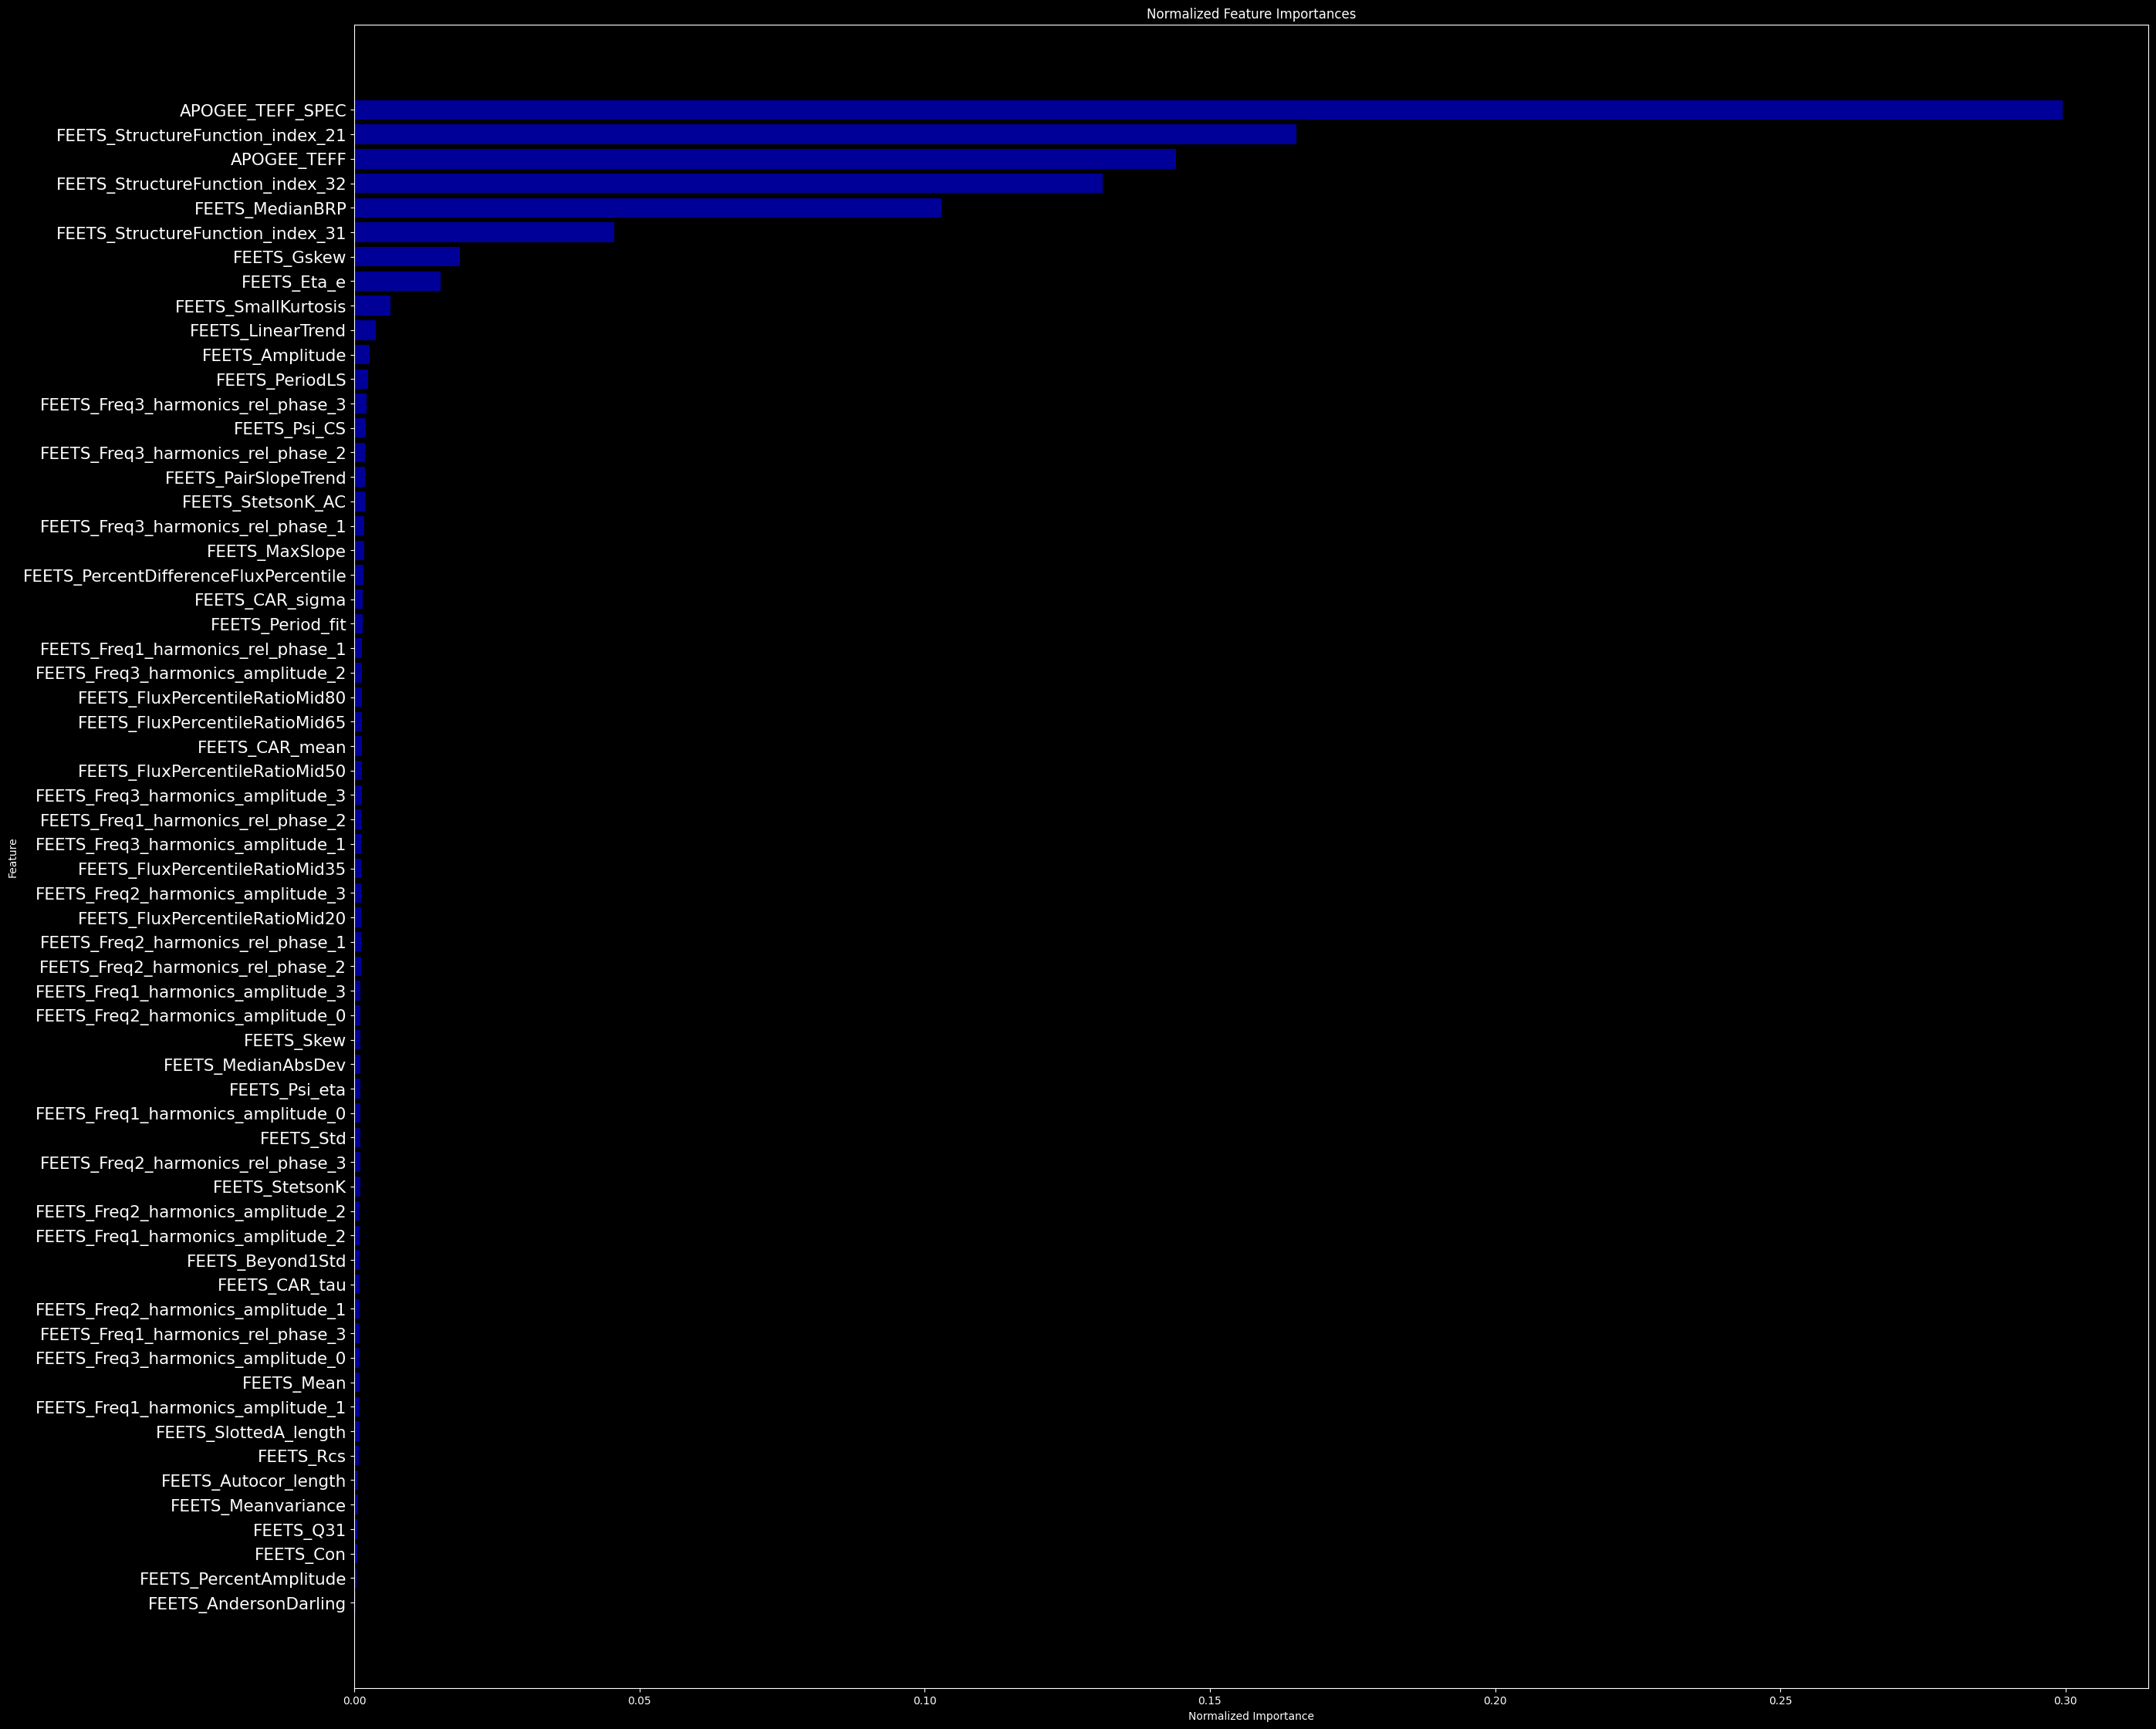

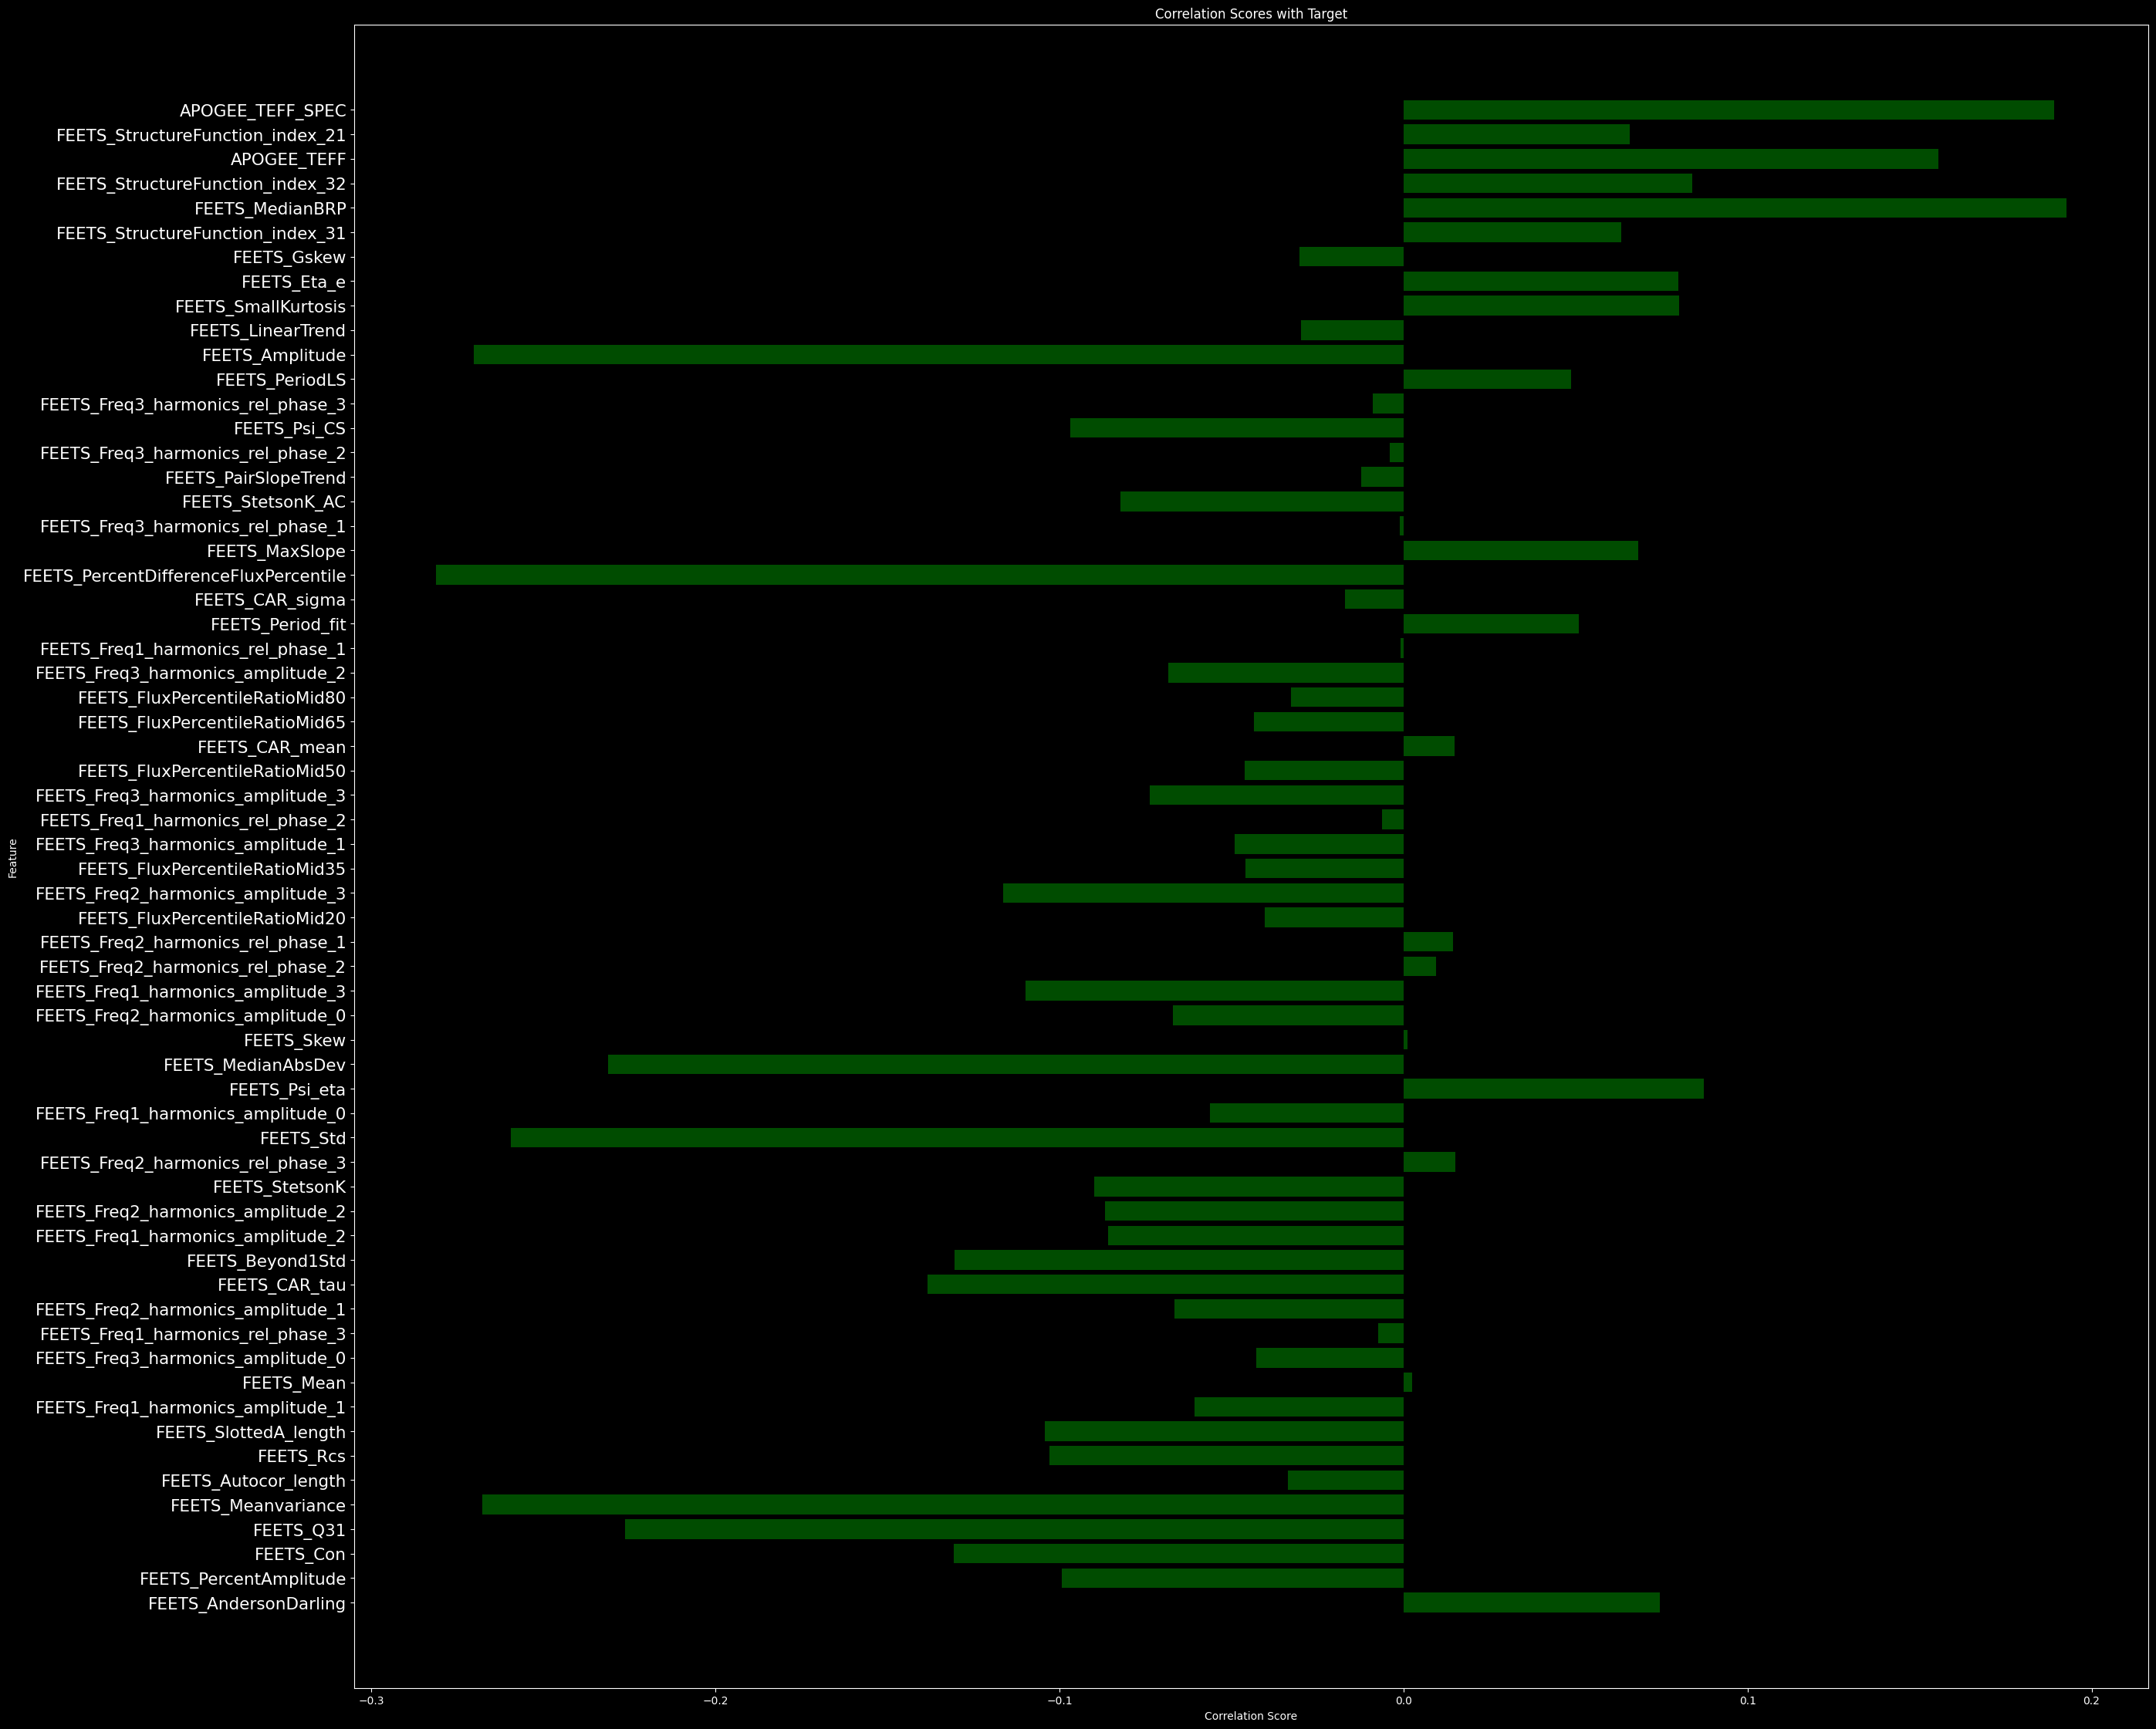

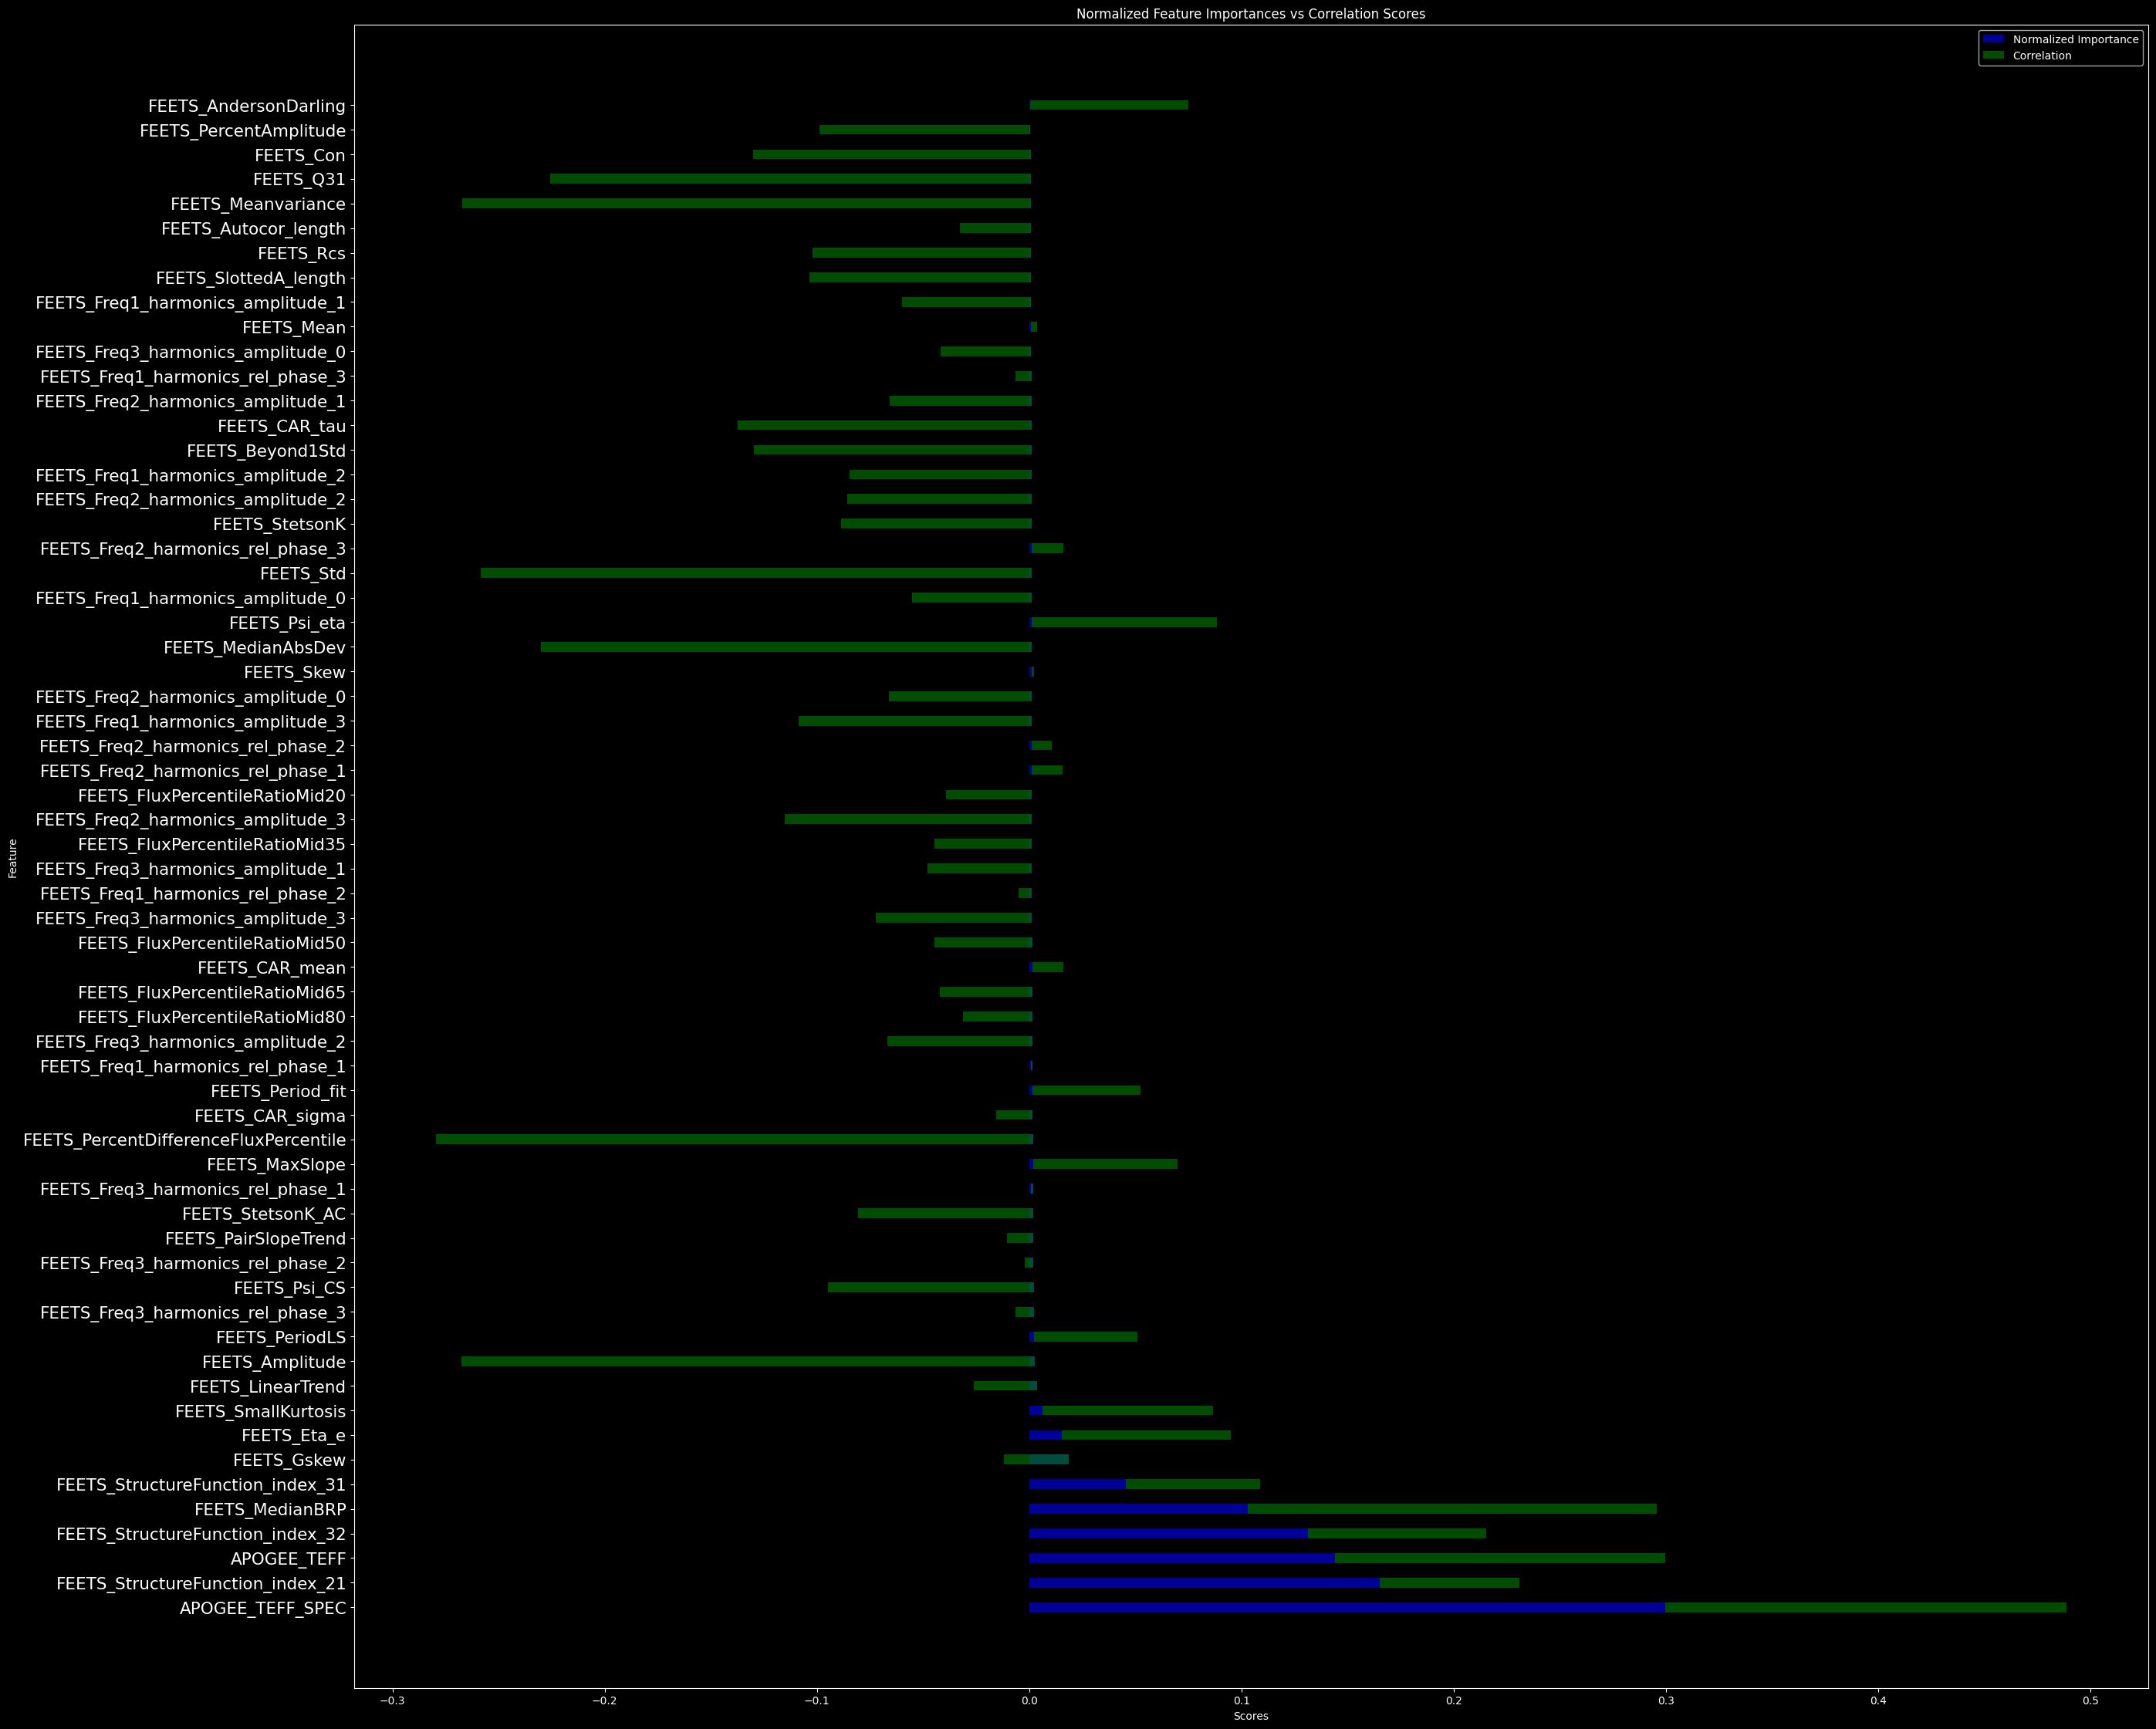

In [70]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import dump

# Assuming the output directory, pipeline, and model are already defined and fitted

# Extract the indices of the selected features
selected_feature_indices = pipeline.named_steps['feature_selection'].get_support(indices=True)

# Map the selected feature indices to the original column names
selected_feature_names = [training_columns[i] for i in selected_feature_indices]

# Get feature importances from the fitted model
feature_importances = rfr.feature_importances_

# Create a DataFrame using the original column names and their importances
importances_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Normalize feature importances
importances_df['Normalized_Importance'] = importances_df['Importance'] / importances_df['Importance'].sum()

# Assuming correlation_df is already defined and contains the correlation scores with the same features
# Merge the importances_df with correlation_df to align the features
merged_df = importances_df.merge(correlation_df, on='Feature')

# Save feature importances and correlation to CSV
importances_path = os.path.join(output_dir, 'feature_importances_with_correlation.csv')
merged_df.to_csv(importances_path, index=False)

# Plot normalized feature importances
plt.figure(figsize=(30, 28))
plt.barh(merged_df['Feature'], merged_df['Normalized_Importance'], color='blue', alpha=0.6, label='Normalized Importance')
plt.xlabel('Normalized Importance')
plt.ylabel('Feature')
plt.yticks(fontsize=15.5)
plt.title('Normalized Feature Importances')
plt.gca().invert_yaxis()

# Save the normalized feature importances plot
normalized_importances_plot_path = os.path.join(output_dir, 'normalized_feature_importances.png')
plt.savefig(normalized_importances_plot_path)
plt.show()

# Plot correlation scores
plt.figure(figsize=(30, 28))
plt.barh(merged_df['Feature'], merged_df['Correlation'], color='green', alpha=0.6, label='Correlation')
plt.xlabel('Correlation Score')
plt.ylabel('Feature')
plt.yticks(fontsize=15.5)
plt.title('Correlation Scores with Target')
plt.gca().invert_yaxis()

# Save the correlation scores plot
correlation_plot_path = os.path.join(output_dir, 'correlation_scores.png')
plt.savefig(correlation_plot_path)
plt.show()

# Plot normalized feature importances vs correlation scores
plt.figure(figsize=(30, 28))
width = 0.4
plt.barh(merged_df['Feature'], merged_df['Normalized_Importance'], color='blue', alpha=0.6, height=width, label='Normalized Importance')
plt.barh(merged_df['Feature'], merged_df['Correlation'], color='green', alpha=0.6, height=width, label='Correlation', left=merged_df['Normalized_Importance'])
plt.xlabel('Scores')
plt.ylabel('Feature')
plt.yticks(fontsize=15.5)
plt.title('Normalized Feature Importances vs Correlation Scores')
plt.legend()

# Save the combined plot
combined_plot_path = os.path.join(output_dir, 'normalized_importances_vs_correlation.png')
plt.savefig(combined_plot_path)
plt.show()
